# Importing Libraries

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno #For visualization of missing datas
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None) #To display all columns
pd.set_option('display.width', None) 
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

#Tüm veri setlerini görmek için bu yöntemi kullanırız.
pd.set_option("display.max_rows",None)#To display all rows

In [20]:
df = pd.read_csv("/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv",encoding='latin_1')#I read main csv file

In [21]:
df.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000.000,Music,T-Series,20082,India,IN,Music,1.000,1.000,1.000,2258000000.000,564600.000,9000000.000,6800000.000,108400000.000,2000000.000,2006.000,Mar,13.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963
1,2,YouTube Movies,170000000,0.000,Film & Animation,youtubemovies,1,United States,US,Games,4055159.000,7670.000,7423.000,12.000,0.000,0.050,0.040,0.580,NaN,2006.000,Mar,5.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
2,3,MrBeast,166000000,28368841870.000,Entertainment,MrBeast,741,United States,US,Entertainment,48.000,1.000,1.000,1348000000.000,337000.000,5400000.000,4000000.000,64700000.000,8000000.000,2012.000,Feb,20.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000.000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.000,2.000,1.000,1975000000.000,493800.000,7900000.000,5900000.000,94800000.000,1000000.000,2006.000,Sep,1.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
4,5,SET India,159000000,148000000000.000,Shows,SET India,116536,India,IN,Entertainment,3.000,2.000,2.000,1824000000.000,455900.000,7300000.000,5500000.000,87500000.000,1000000.000,2006.000,Sep,20.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963
5,6,Music,119000000,0.000,NaN,Music,0,NaN,NaN,Music,4057944.000,NaN,NaN,NaN,0.000,0.000,0.000,0.000,NaN,2013.000,Sep,24.000,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,93247040539.000,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,5.000,3.000,3.000,731674000.000,182900.000,2900000.000,2200000.000,35100000.000,NaN,2015.000,May,12.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
7,8,PewDiePie,111000000,29058044447.000,Gaming,PewDiePie,4716,Japan,JP,Entertainment,44.000,1.000,4.000,39184000.000,9800.000,156700.000,117600.000,1900000.000,NaN,2010.000,Apr,29.000,63.200,126226568.000,2.290,115782416.000,36.205,138.253
8,9,Like Nastya,106000000,90479060027.000,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,630.000,5.000,25.000,48947000.000,12200.000,195800.000,146800.000,2300000.000,100000.000,2016.000,Jan,14.000,81.900,144373535.000,4.590,107683889.000,61.524,105.319
9,10,Vlad and Niki,98900000,77180169894.000,Entertainment,Vlad and Niki,574,United States,US,Entertainment,8.000,5.000,6.000,580574000.000,145100.000,2300000.000,1700000.000,27900000.000,600000.000,2018.000,Apr,23.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713


# 2.EDA

In [22]:
df.shape #I examine shape of the data

(995, 28)

In [23]:
df.info() #Also examine type of datas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [24]:
df["Country"].unique()

array(['India', 'United States', nan, 'Japan', 'Russia', 'South Korea',
       'United Kingdom', 'Canada', 'Brazil', 'Argentina', 'Chile', 'Cuba',
       'El Salvador', 'Pakistan', 'Philippines', 'Thailand', 'Colombia',
       'Barbados', 'Mexico', 'United Arab Emirates', 'Spain',
       'Saudi Arabia', 'Indonesia', 'Turkey', 'Venezuela', 'Kuwait',
       'Jordan', 'Netherlands', 'Singapore', 'Australia', 'Italy',
       'Germany', 'France', 'Sweden', 'Afghanistan', 'Ukraine', 'Latvia',
       'Switzerland', 'Vietnam', 'Malaysia', 'China', 'Iraq', 'Egypt',
       'Andorra', 'Ecuador', 'Morocco', 'Peru', 'Bangladesh', 'Finland',
       'Samoa'], dtype=object)

In [25]:
df["Abbreviation"].unique()

array(['IN', 'US', nan, 'JP', 'RU', 'KR', 'GB', 'CA', 'BR', 'AR', 'CL',
       'CU', 'SV', 'PK', 'PH', 'TH', 'CO', 'BB', 'MX', 'AE', 'ES', 'SA',
       'ID', 'TR', 'VE', 'KW', 'JO', 'NL', 'SG', 'AU', 'IT', 'DE', 'FR',
       'SE', 'AF', 'UA', 'LV', 'CH', 'VN', 'MY', 'CN', 'IQ', 'EG', 'AD',
       'EC', 'MA', 'PE', 'BD', 'FI', 'WS'], dtype=object)

In [26]:
df.isnull().sum() #I check missing values.

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

# Handling Missing Values

<Axes: >

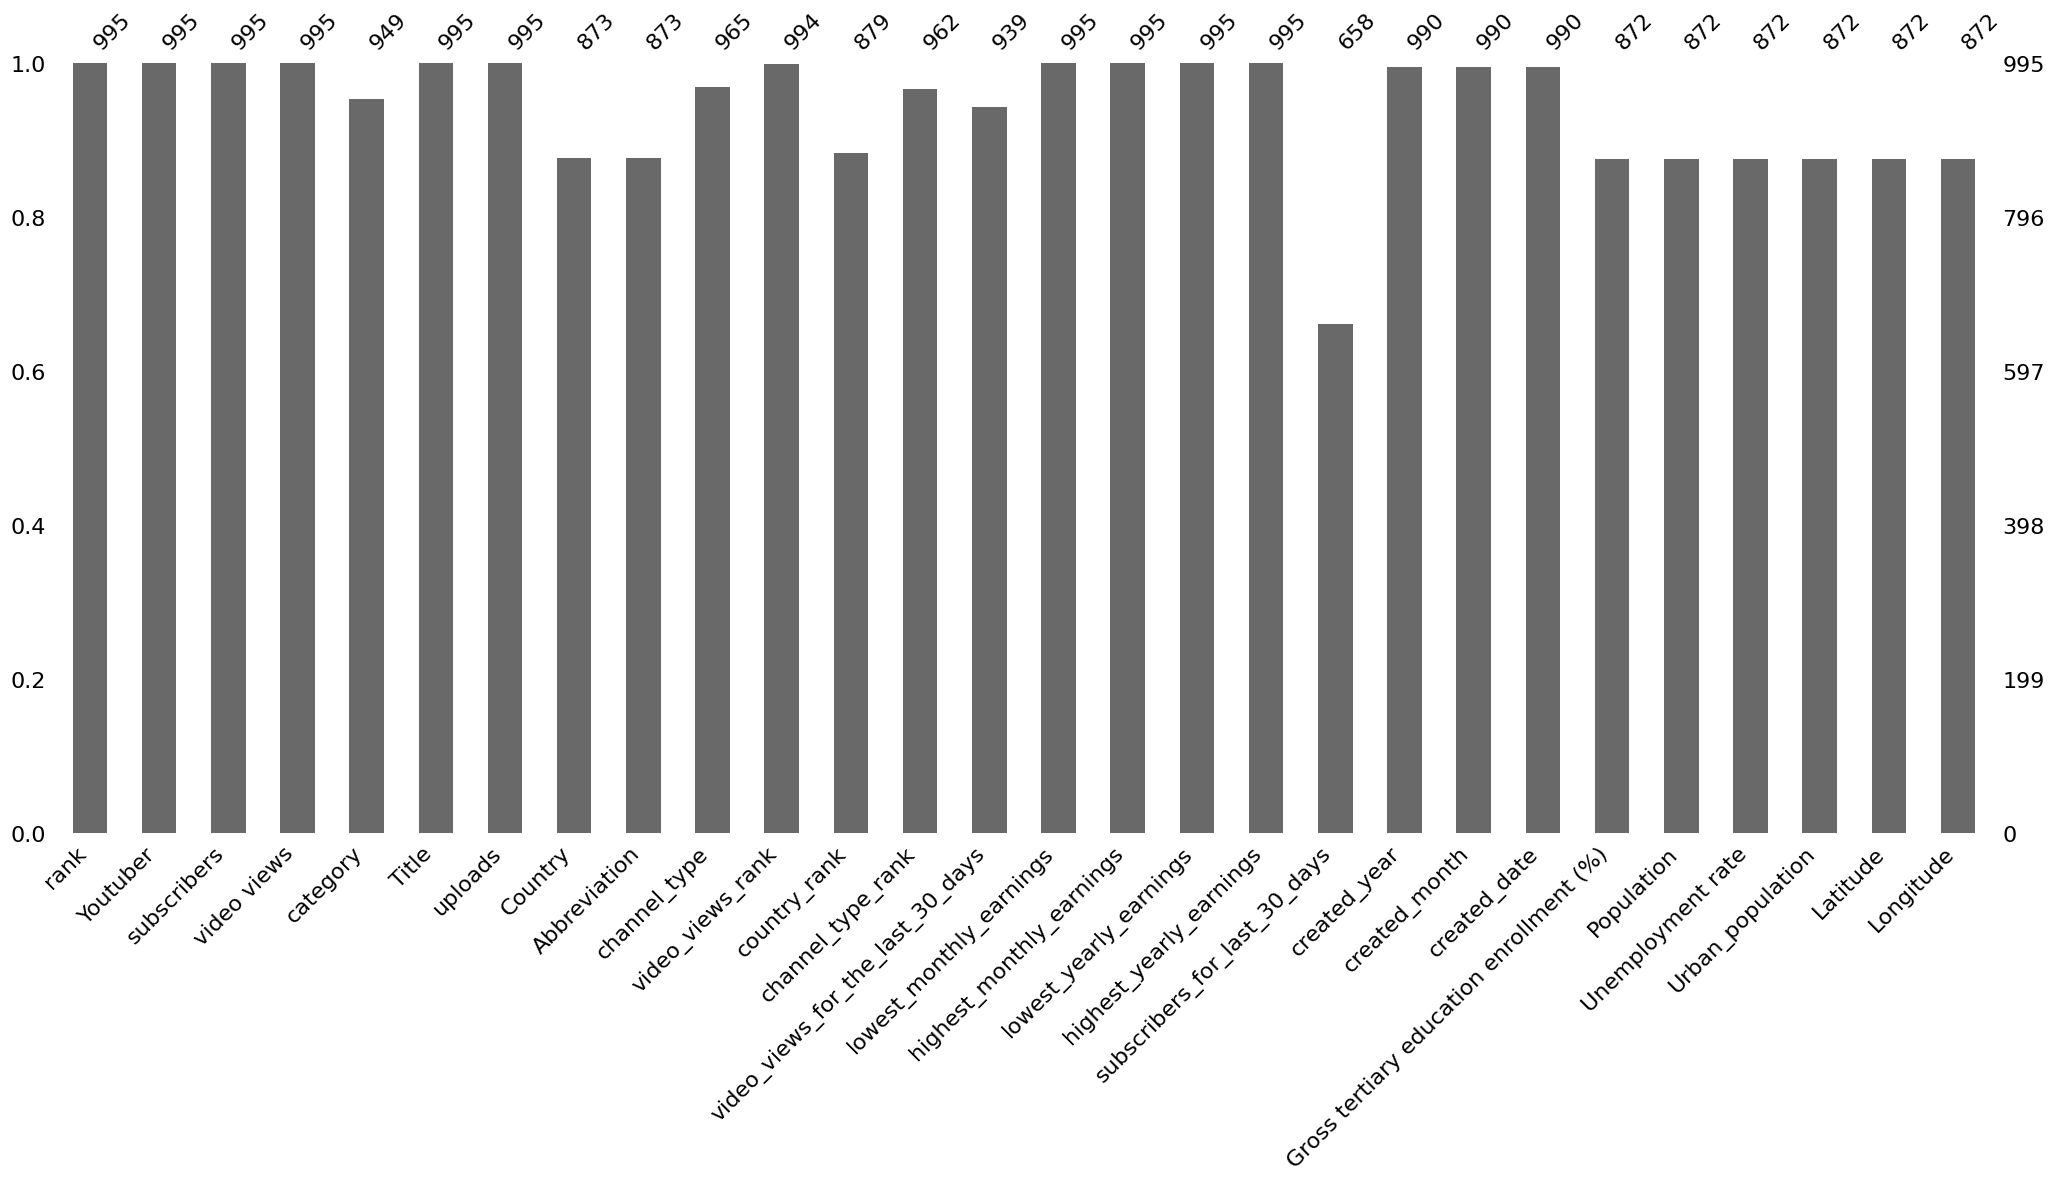

In [27]:
msno.bar(df) #With msno graphics i can visualize missing variables.

<Axes: >

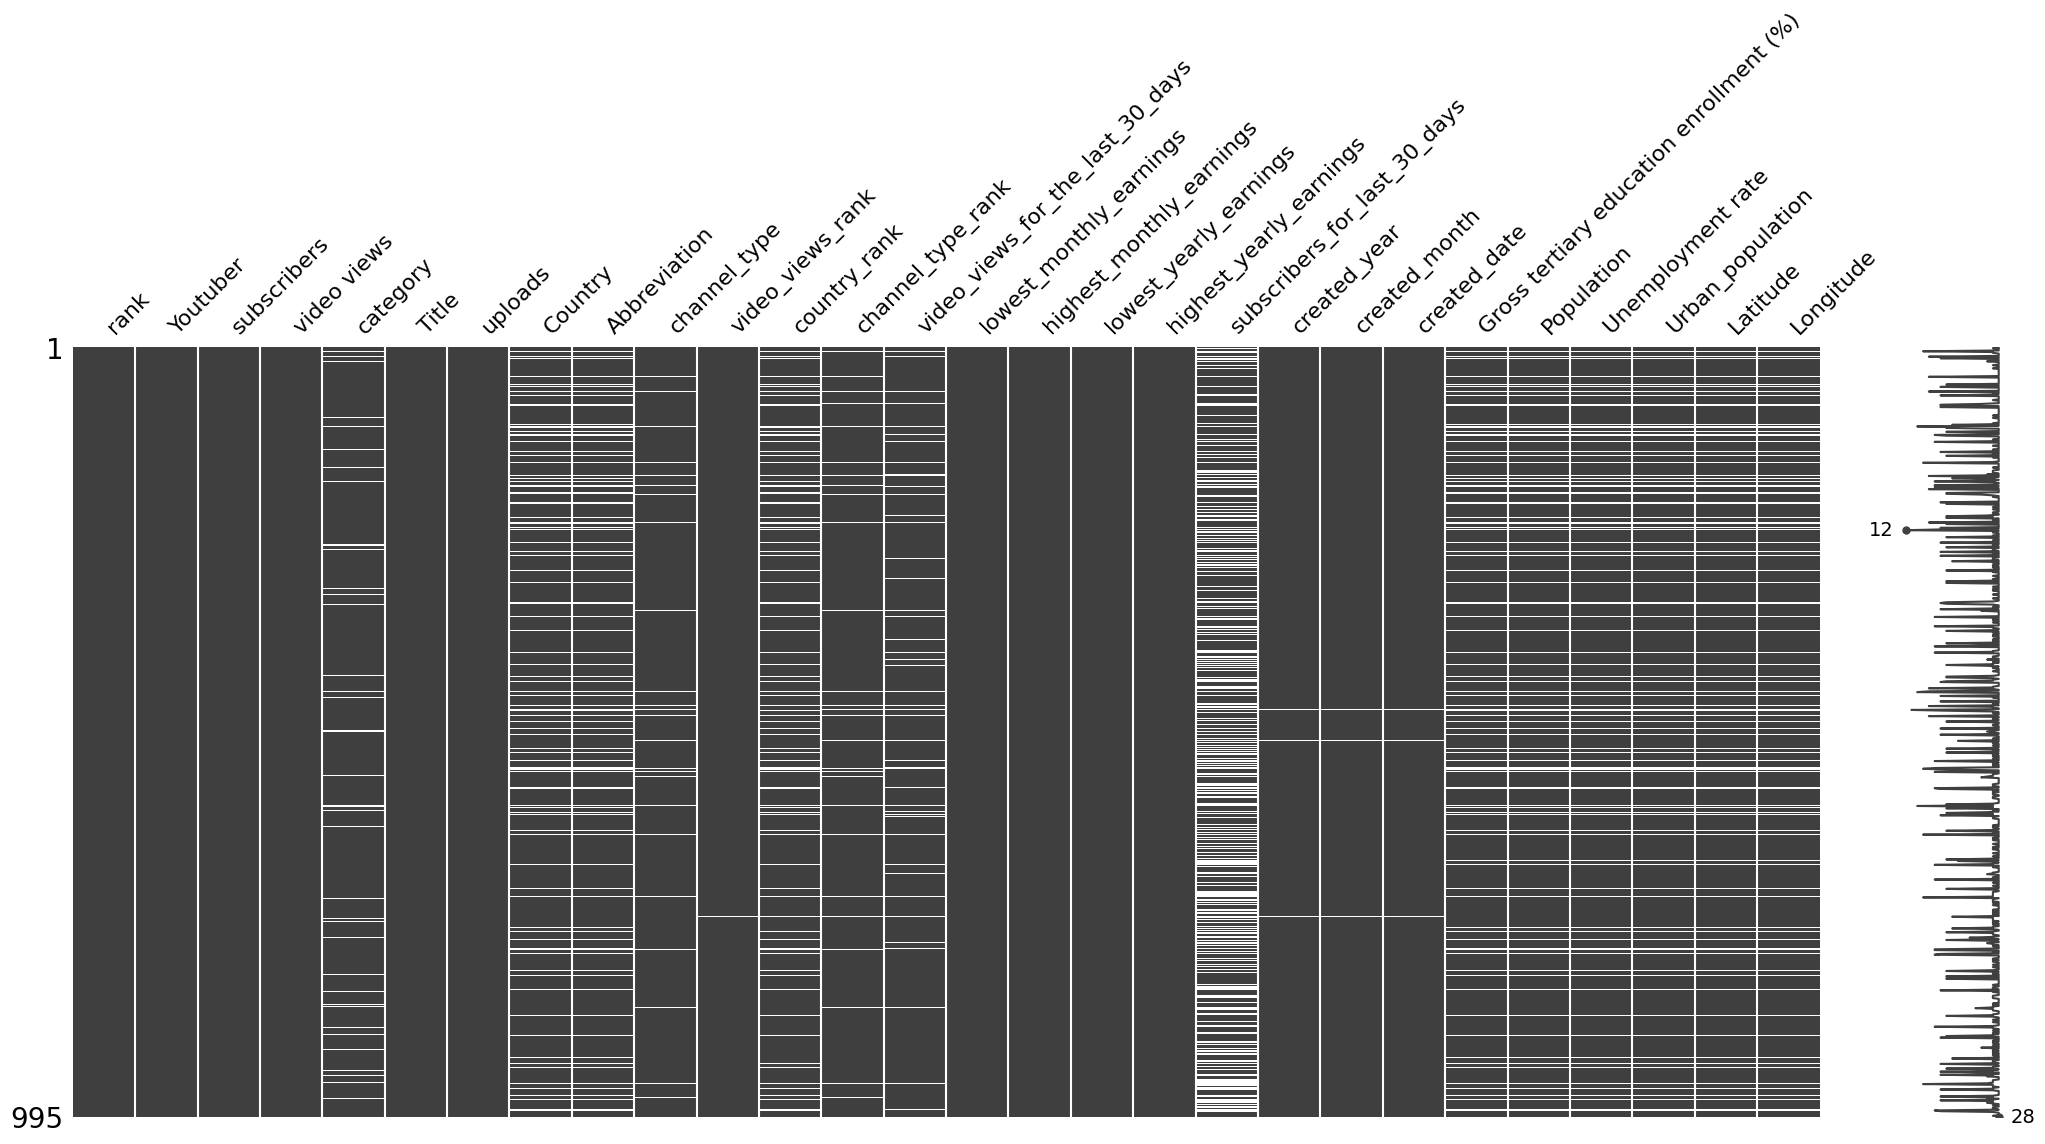

In [28]:
msno.matrix(df) #With msno matrix i can observe missing variable relationship.

In [ ]:
#country,abbrevation,Gross terriary education,Population,Unemployment rate,urban population,Latitude and Longitude have similar pattern in missing values.

In [ ]:
#To make sure its relationship, i need a correlation map.
msno.heatmap(df)

<Axes: >

In [ ]:
#I check relationship between missing values.

In [30]:
index_population = list(df[df["Population"].isnull()].index)
index_unemployment_rate = list(df[df["Unemployment rate"].isnull()].index)
index_country = list(df[df["Country"].isnull()].index)

In [31]:
index_unemployment_rate[:5]

[5, 12, 14, 38, 48]

In [32]:
 index_country[:5]

[5, 12, 14, 38, 48]

In [33]:
df["category"].value_counts()

category
Entertainment            241
Music                    202
People & Blogs           132
Gaming                    94
Comedy                    69
Film & Animation          46
Education                 45
Howto & Style             40
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Travel & Events            1
Name: count, dtype: int64

In [34]:
# I will chech if it is ok.
for i in index_country:
    if i  not in index_unemployment_rate:
        print("Error")

In [35]:
for i,x in zip(index_population,index_unemployment_rate):
    if i != x:
        print("Error") #I chech also other variables if it is related or not.

# Filling Datas Using ChatGpt

In [ ]:
'''To complete some categorical variables like nationality of Youtuber and abbreviation
i need to make researh and fill with my hand. But i prefer easy way like filling this 
information by using Chatgpt."""

#To do so you can use either API or you can ask chatGPT to make dictionary.
I prefer asking GPT.

In [36]:
df["Country"].isnull().sum()

122

In [37]:
GPT_country={              
    "Music": "null",
    "Gaming": "null",
    "Goldmines": "India (IN)",
    "LooLoo Kids - Nursery Rhymes and Children's Songs": "Romania (RO)",
    "Badabun": "Mexico (MX)",
    "Bad Bunny": "Puerto Rico (PR)",
    "BRIGHT SIDE": "USA (US)",
    "HolaSoyGerman.": "Chile (CL)",
    "elrubiusOMG": "Spain (ES)",
    "Toys and Colors": "USA (US)",
    "LUCCAS NETO - LUCCAS TOON": "Brazil (BR)",
    "PowerKids TV": "India (IN)",
    "News": "null",
    "Ozuna": "Puerto Rico (PR)",
    "MrBeast Gaming": "USA (US)",
    "Total Gaming": "India (IN)",
    "T-Series Apna Punjab": "India (IN)",
    "Techno Gamerz": "India (IN)",
    "Desi Music Factory": "India (IN)",
    "WowKidz": "India (IN)",
    "SMTOWN": "South Korea (KR)",
    "Luis Fonsi": "Puerto Rico (PR)",
    "Frost Diamond": "Indonesia (ID)",
    "jacksepticeye": "Ireland (IE)",
    "Popular on YouTube": "null",
    "Shorts Break": "India (IN)",
    "Aditya Music India": "India (IN)",
    "Masha y el Oso": "Russia (RU)",
    "Drake": "Canada (CA)",
    "Goldmines Dishoom": "India (IN)",
    "ToyPuddingTV": "Japan (JP)",
    "Gulshan Kalra": "India (IN)",
    "NichLmao": "USA (US)",
    "Marília Mendonça": "Brazil (BR)",
    "Fede Vigevani": "Uruguay (UY)",
    "ZHC": "USA (US)",
    "Las Ratitas": "Spain (ES)",
    "ABPLIVE": "India (IN)",
    "Chris Brown": "USA (US)",
    "mujjuu___14": "India (IN)",
    "Amit Bhadana": "India (IN)",
    "Daniel LaBelle": "USA (US)",
    "Goldmines Movies": "India (IN)",
    "Venus Entertainment": "India (IN)",
    "NickyJamTV": "USA (US)",
    "Akshay Nagwadiya": "India (IN)",
    "KL BRO Biju Rithvik": "India (IN)",
    "Like Nastya PRT": "Russia (RU)",
    "Rotana": "Saudi Arabia (SA)",
    "Netflix India": "India (IN)",
    "Sourav Joshi Vlogs": "India (IN)",
    "SMOL": "Russia (RU)",
    "Khan GS Research Centre": "India (IN)",
    "Minecraft - Topic": "null",
    "Zach King": "USA (US)",
    "ýýýýýýýýýýýýýýý - Genevieve's Playhouse": "USA (US)",
    "Family GamesTV": "Russia (RU)",
    "Robin Hood Gamer": "Brazil (BR)",
    "Troom Troom Es": "Ukraine (UA)",
    "Vsauce": "USA (US)",
    "Unbox Therapy": "Canada (CA)",
    "Goldmines Great Indian Comedy": "India (IN)",
    "Lil Nas X": "USA (US)",
    "Masha e o Urso": "Russia (RU)",
    "Cardi B": "USA (US)",
    "Busy Fun Ltd": "null",
    "Ali-A": "UK (GB)",
    "The ACE Family": "USA (US)",
    "Dhar Mann": "USA (US)",
    "Good Mythical Morning": "USA (US)",
    "Bobby chourasiya": "India (IN)",
    "Ajay Sharma": "India (IN)",
    "BeatboxJCOP": "USA (US)",
    "Zuni and Family": "USA (US)",
    "Lil Pump": "USA (US)",
    "Koray Zeynep": "Turkey (TR)",
    "PopularMMOs": "USA (US)",
    "Gaby and Alex": "UK (GB)",
    "DeToxoMoroxo": "Mexico (MX)",
    "Doggy Doggy Cartoons": "Russia (RU)",
    "deepesh zo": "India (IN)",
    "Salman Noman": "Pakistan (PK)",
    "RCTI - LAYAR DRAMA INDONESIA": "Indonesia (ID)",
    "Alfredo Larin": "El Salvador (SV)",
    "ExtraPolinesios": "Mexico (MX)",
    "Live": "null",
    "TWICE": "South Korea (KR)",
    "sagar kalra (Shorts)": "India (IN)",
    "Enes Batur": "Turkey (TR)",
    "Kuplinov": "Russia (RU)",
    "Super Senya": "Russia (RU)",
    "Kim Loaiza": "Mexico (MX)",
    "Hongyu ASMR": "China (CN)",
    "BigSchool": "USA (US)",
    "ZutiGang": "France (FR)",
    "Major Lazer Official": "USA (US)",
    "Hear This Music": "null",
    "NOBRU": "Brazil (BR)",
    "Zig & Sharko": "France (FR)",
    "Crazy Frog": "Germany (DE)",
    "The Dodo": "USA (US)",
    "Dental Digest": "USA (US)",
    "Alexa Rivera": "USA (US)",
    "JD Pantoja": "Mexico (MX)",
    "Desi Gamers": "India (IN)",
    "Stray Kids": "South Korea (KR)",
    "Ei Nerd": "Brazil (BR)",
    "Ian Boggs": "USA (US)",
    "Knowledge Tv": "India (IN)",
    "Rauw Alejandro": "Puerto Rico (PR)",
    "Troom Troom India": "India (IN)",
    "Ian Lucas": "Argentina (AR)",
    "Jass Records": "India (IN)",
    "Ja Mill": "Philippines (PH)",
    "Troom Troom PT": "Ukraine (UA)",
    "Troom Troom Indonesia": "Indonesia (ID)",
    "Hero Movies 2023": "India (IN)",
    "TKOR": "USA (US)",
    "ANNA KOVA": "France (FR)"
}

In [38]:

for tuber in df["Youtuber"]:  #I fill missing datas from ChatGPT
  if tuber in GPT_country:
    if GPT_country[tuber].split()[0] !="null":
        index_of_tuber = df[df["Youtuber"]== tuber].index[0]
        df.loc[index_of_tuber,"Country"]= GPT_country[tuber].split()[0]
        df.loc[index_of_tuber,"Abbreviation"]= GPT_country[tuber].replace("(","").replace(")","").split()[1]
        

In [39]:
df["Country"].isnull().sum()

15

In [ ]:
#I repeat this process in category and channel sections.

In [40]:
GPT_category = {
    "Music": "Music",
    "Gaming": "Gaming",
    "Sports": "Sports",
    "Vlad vï¿½ï¿½ï": "null",
    "News": "News & Politics",
    "BETER Bï¿½ï¿½": "null",
    "Diana and Roma ESP": "People & Blogs",
    "ýýýýýýýýýýýýýýý ýýýýýý ýýýýýýýýýýýýýýýýýý": "null",
    "Popular on YouTube": "Entertainment",
    "D Billions": "Entertainment",
    "shfa show India": "People & Blogs",
    "Super JoJo - Nursery Rhymes & Kids Songs": "Education",
    "Diana and Roma ARA": "People & Blogs",
    "Vlad and Niki Arabic": "People & Blogs",
    "Vlad and Niki ESP": "People & Blogs",
    "ZAMZAM ELECTRONICS TRADING": "Science & Technology",
    "Vlad and Niki IDN": "People & Blogs",
    "Minecraft - Topic": "Gaming",
    "Manoj  parihar": "People & Blogs",
    "Busy Fun Ltd": "Entertainment",
    "Smile Family Spanish": "People & Blogs",
    "ýýýýýýýýý KIMPRO": "null",
    "Jane ASMR ï¿½ï¿½": "Howto & Style",
    "Ivana Alawi": "People & Blogs",
    "Live": "Entertainment",
    "Vlad and Niki ARA": "People & Blogs",
    "Panda Shorts": "Entertainment",
    "MY FAMILY": "People & Blogs",
    "Filaretiki": "Entertainment",
    "Lotus Music": "Music",
    "Eli Kids - Cartoons & Songs": "Education",
    "Vlad and Niki PRT": "People & Blogs",
    "ýýýýýýýý ýý ýýýýýýýýýýýý": "null",
    "Zeinab Harake": "People & Blogs",
    "Vlad y Niki Show": "People & Blogs",
    "Vibhu 96": "People & Blogs",
    "Vilmei": "null",
    "WiederDude": "Entertainment",
    "Wolfoo Channel": "Education",
    "FACT FIRE KING": "Entertainment",
    "Diana and Roma IND": "People & Blogs",
    "Heidi y Zidane": "People & Blogs",
    "Wolfoo Family": "Education",
    "Bebefinn - Nursery Rhymes & Kids Songs": "Education",
    "DEV Ke Facts": "Education",
    "Panda": "Entertainment"
}


In [41]:
empthy_channel = df[df["category"].isnull()][["Youtuber","category"]].index #I want to index all null values

In [42]:
for  cat in empthy_channel:       #I take non null values in ChatGPT
    liste = df.loc[cat,"Youtuber"]
    if GPT_category[liste] != "null":
        df.loc[cat,"category"] = GPT_category[liste]


In [43]:
df["category"].isnull().sum()

6

In [44]:
GPT_channel = {
    "LooLoo Kids - Nursery Rhymes and Children's Songs": "Entertainment",
    "BRIGHT SIDE": "Education",
    "News": "News",
    "Luis Fonsi": "Music",
    "Frost Diamond": "Games",
    "Shorts Break": "Entertainment",
    "Masha y el Oso": "Entertainment",
    "Sandeep Maheshwari": "Education",
    "Fede Vigevani": "Entertainment",
    "Chris Brown": "Music",
    "YOLO": "Games",
    "Masha e o Urso": "Entertainment",
    "Cardi B": "Music",
    "Busy Fun Ltd": "Entertainment",
    "Dhar Mann": "Entertainment",
    "Good Mythical Morning": "Entertainment",
    "Ajay Sharma": "null",
    "The Game Theorists": "Games",
    "Doggy Doggy Cartoons": "Entertainment",
    "Salman Noman": "null",
    "IDEAS EN 5 MINUTOS": "Howto",
    "Live": "null",
    "Super Senya": "null",
    "Major Lazer Official": "Music",
    "The Dodo": "Animals",
    "ýýýýýýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýýýýýýý": "null",
    "Blockbuster Movies": "Entertainment",
    "Jomy Production": "null",
    "Ja Mill": "null",
    "Quantum Tech HD": "Tech"
}


In [45]:
empthy_channel = df[df["channel_type"].isnull()][["Youtuber","channel_type"]].index #I want to index all null values

In [46]:
for  ch in empthy_channel:       #I take non null values in ChatGPT
    liste = df.loc[ch,"Youtuber"]
    if GPT_channel[liste] != "null":
        df.loc[ch,"channel_type"] = GPT_channel[liste]
    

In [47]:
df["channel_type"].isnull().sum()

7

In [48]:
df[(df["Country"].notnull()) & (df["Population"].notnull())].head(10) #I choose not null values in country and population columns

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000.000,Music,T-Series,20082,India,IN,Music,1.000,1.000,1.000,2258000000.000,564600.000,9000000.000,6800000.000,108400000.000,2000000.000,2006.000,Mar,13.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963
1,2,YouTube Movies,170000000,0.000,Film & Animation,youtubemovies,1,United States,US,Games,4055159.000,7670.000,7423.000,12.000,0.000,0.050,0.040,0.580,NaN,2006.000,Mar,5.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
2,3,MrBeast,166000000,28368841870.000,Entertainment,MrBeast,741,United States,US,Entertainment,48.000,1.000,1.000,1348000000.000,337000.000,5400000.000,4000000.000,64700000.000,8000000.000,2012.000,Feb,20.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000.000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.000,2.000,1.000,1975000000.000,493800.000,7900000.000,5900000.000,94800000.000,1000000.000,2006.000,Sep,1.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
4,5,SET India,159000000,148000000000.000,Shows,SET India,116536,India,IN,Entertainment,3.000,2.000,2.000,1824000000.000,455900.000,7300000.000,5500000.000,87500000.000,1000000.000,2006.000,Sep,20.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963
6,7,ýýý Kids Diana Show,112000000,93247040539.000,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,5.000,3.000,3.000,731674000.000,182900.000,2900000.000,2200000.000,35100000.000,NaN,2015.000,May,12.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
7,8,PewDiePie,111000000,29058044447.000,Gaming,PewDiePie,4716,Japan,JP,Entertainment,44.000,1.000,4.000,39184000.000,9800.000,156700.000,117600.000,1900000.000,NaN,2010.000,Apr,29.000,63.200,126226568.000,2.290,115782416.000,36.205,138.253
8,9,Like Nastya,106000000,90479060027.000,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,630.000,5.000,25.000,48947000.000,12200.000,195800.000,146800.000,2300000.000,100000.000,2016.000,Jan,14.000,81.900,144373535.000,4.590,107683889.000,61.524,105.319
9,10,Vlad and Niki,98900000,77180169894.000,Entertainment,Vlad and Niki,574,United States,US,Entertainment,8.000,5.000,6.000,580574000.000,145100.000,2300000.000,1700000.000,27900000.000,600000.000,2018.000,Apr,23.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
10,11,Zee Music Company,96700000,57856289381.000,Music,Zee Music Company,8548,India,IN,Music,12.000,3.000,2.000,803613000.000,200900.000,3200000.000,2400000.000,38600000.000,1100000.000,2014.000,Mar,12.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963


<Axes: >

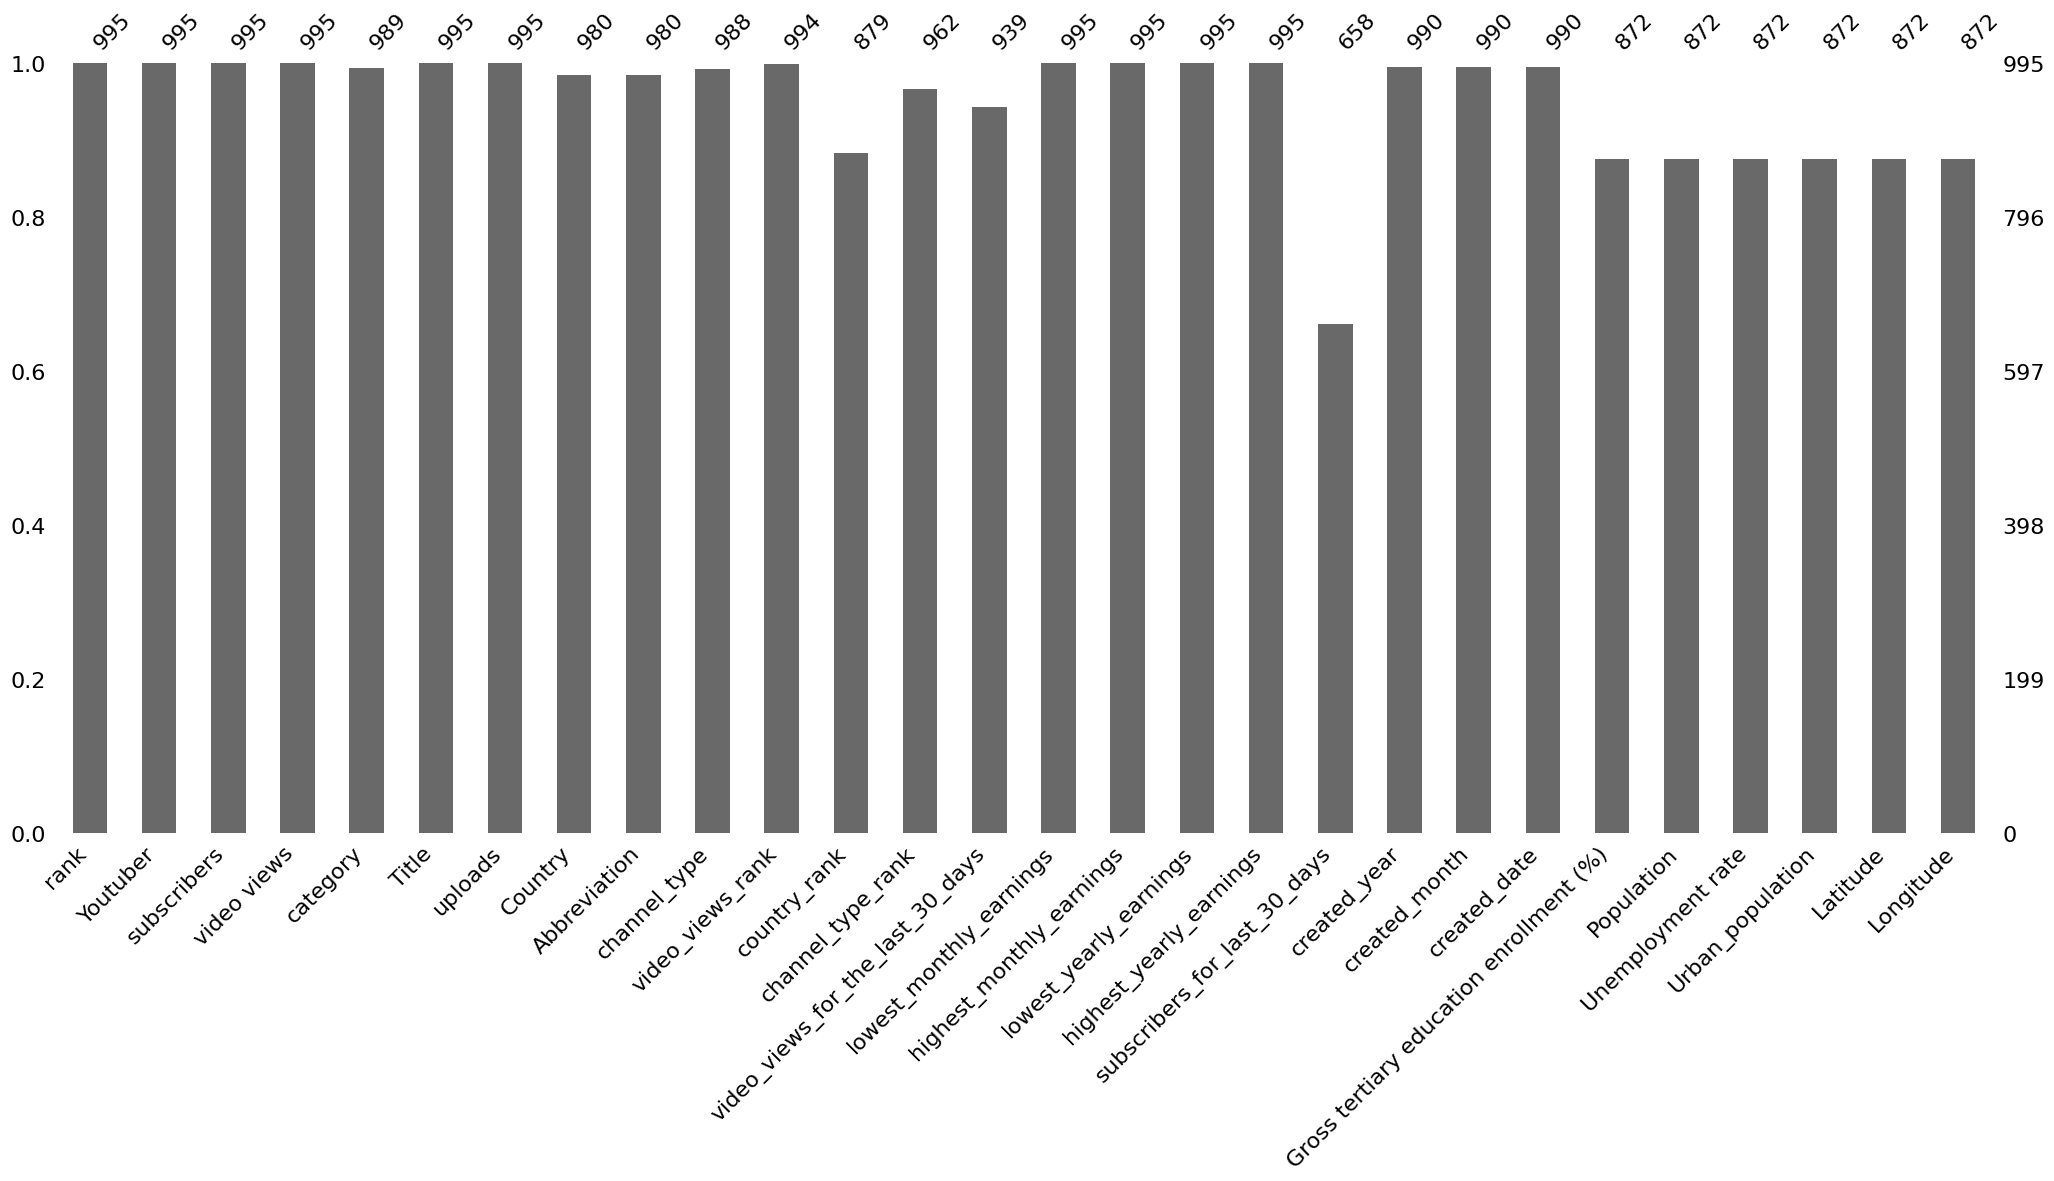

In [49]:
msno.bar(df)

# Filling Missing Values Using Related Datas

In [ ]:
#Filling Population, unemployment rate etc. based on country.

In [50]:
grouped_by_country = df[(df["Country"].notna()) & (df["Population"].notna())].groupby(["Country"])[['Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']].mean() #According to country I can find population,unemployment rate etc.

In [51]:
grouped_by_country

,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
Country,,,,,,
Afghanistan,9.700,38041754.000,11.120,9797273.000,33.939,67.710
Argentina,90.000,44938712.000,9.790,41339571.000,-38.416,-63.617
Australia,113.100,25766605.000,5.270,21844756.000,-25.274,133.775
Bangladesh,20.600,167310838.000,4.190,60987417.000,23.685,90.356
Barbados,65.400,287025.000,10.330,89431.000,13.194,-59.543
Brazil,51.300,212559417.000,12.080,183241641.000,-14.235,-51.925
Canada,68.900,36991981.000,5.560,30628482.000,56.130,-106.347
Chile,88.500,18952038.000,7.090,16610135.000,-35.675,-71.543
China,50.600,1397715000.000,4.320,842933962.000,35.862,104.195


In [52]:
missing_variables = ['Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']

In [54]:
missing_population = df[df["Population"].isna()].index

In [55]:
missing_population 

Index([  5,  12,  14,  38,  48,  51,  57,  62,  74,  75,
       ...
       925, 931, 935, 939, 951, 958, 967, 972, 985, 986],
      dtype='int64', length=123)

In [56]:
df.loc[5,'Gross tertiary education enrollment (%)'] #Checking missing values

nan

In [57]:
for pop in missing_population:
    if df.loc[pop,"Country"] is not np.nan:
        country = df.loc[pop,"Country"]
        if country in grouped_by_country.index:
            df.loc[pop,missing_variables] = grouped_by_country.loc[country,missing_variables]

In [58]:
df["Population"].isna().sum()

57

<Axes: >

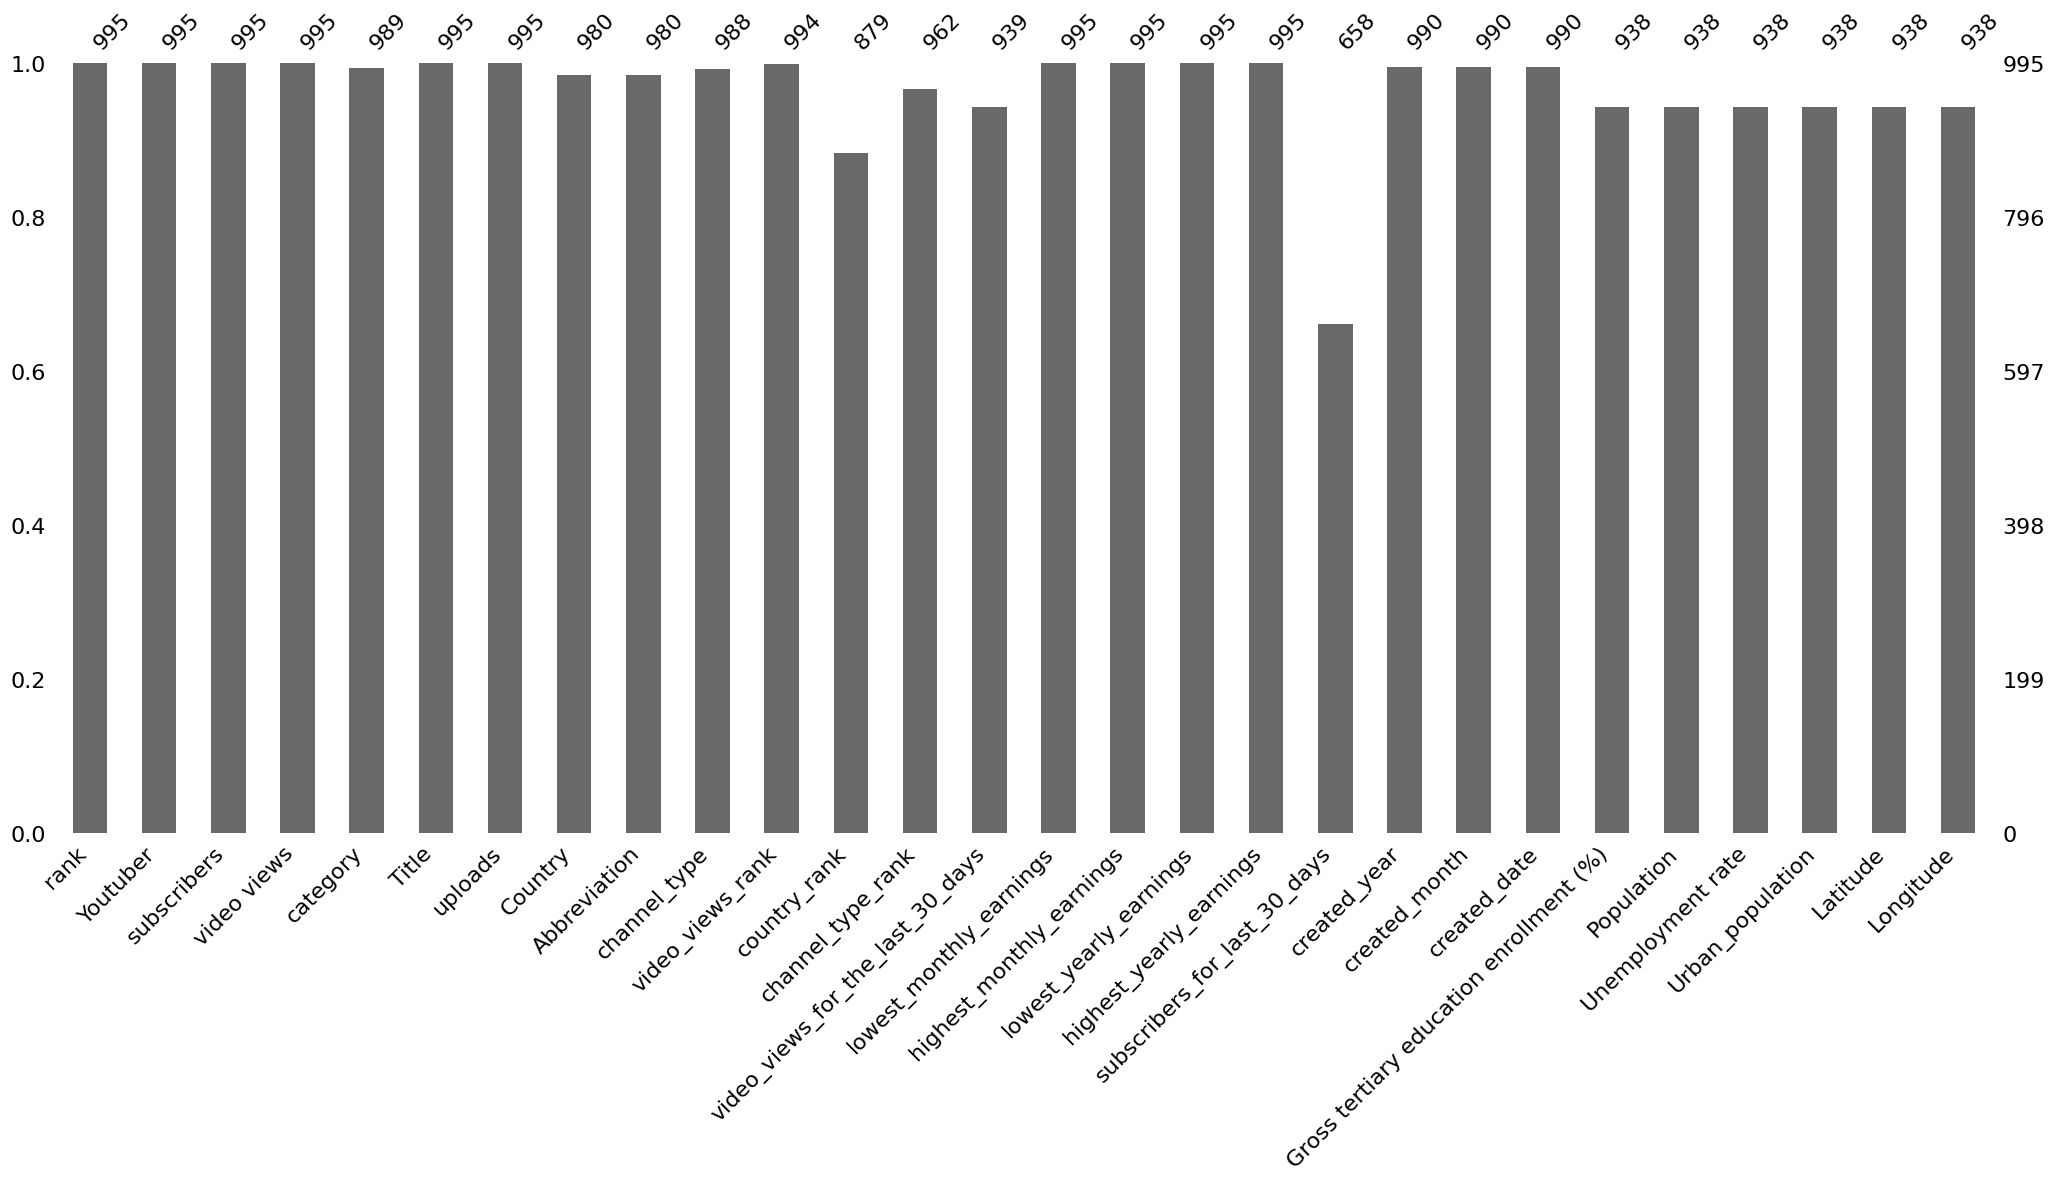

In [59]:
msno.bar(df)

# CheckPoint-1 of Project

In [ ]:
df.to_csv("filled_data.csv") #I export file to study later.

In [ ]:
df = pd.read_csv("/kaggle/input/filled/filled_data.csv")

# Defining Type of Variables

In [60]:
def grab_col_names(dataframe,cat_th=18,car_th=49):
  
  cat_cols=[col for col in df.columns if str(df[col].dtypes) in ["category","object","bool"]]
  num_but_cat =[col for col in df.columns if (df[col].nunique() < cat_th) and (df[col].dtypes in ["int","float"])]
  cat_but_car=[col for col in df.columns if df[col].nunique()>car_th and str(df[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols+num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols=[col for col in df.columns if str(df[col].dtype) in ["float64","int64"]]
  num_cols=[col for col in num_cols if col not in cat_cols]
  print(f"Observations: {dataframe. shape [0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f' cat_cols: {len(cat_cols)} ')
  print(f' num_cols: {len(num_cols)}')
  print(f' cat_but_car: {len(cat_but_car)}')
  print(f' num_but_cat: {len(num_but_cat)}')
  return cat_cols,num_cols,cat_but_car


In [61]:
cat_cols,num_cols,cat_but_car = grab_col_names(df,19,58) #I define treshold based on unique value amounts.
# As i observed treshold for categorical variables are between 19 and 58.

Observations: 995
Variables: 28
 cat_cols: 5 
 num_cols: 21
 cat_but_car: 2
 num_but_cat: 0


 I defined variables by function but i edit in the end.

In [62]:
cat_cols = ['category', 'Country', 'Abbreviation', 'channel_type', 'created_month']

In [ ]:
num_cols = ['subscribers',
 'video views',
 'uploads',
 'video_views_rank',
 'country_rank',
 'channel_type_rank',
 'video_views_for_the_last_30_days',
 'lowest_monthly_earnings',
 'highest_monthly_earnings',
 'lowest_yearly_earnings',
 'highest_yearly_earnings',
 'subscribers_for_last_30_days']

In [63]:
cat_but_car = ['Youtuber', 'Title', 'created_date', 'rank']

In [65]:
num_but_cat=['created_year', 'Gross tertiary education enrollment (%)',
 'Population',
 'Unemployment rate',
 'Urban_population',
 'Latitude',
 'Longitude']

# Data Visualization

In [67]:
def num_summary(dataframe,numerical_col,plot=False): #To check numerical values in graphic
  print("********")
  quantiles = [0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.99]
  print(dataframe[numerical_col].describe(quantiles).T)
  if plot:
    sns.histplot(data=df,x=df[col])
    plt.show()
    sns.boxplot(data=df,x=df[col])
    plt.show()

In [68]:
def cat_summary(dataframe,col_name,plot=False): #To check categorical values in graphic
  print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),
                      "Ratio":100*dataframe[col_name].value_counts()/len(dataframe)}))
  print("*******************************")
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.rc('xtick', labelsize=10) 
    if dataframe[col_name].nunique() > 12:
        plt.xticks(rotation=90)
        plt.rc('xtick', labelsize=5)
    else:
        plt.rc('xtick', labelsize=10) 
    plt.show(block=True)


                       category  Ratio
category                              
Entertainment               250 25.126
Music                       204 20.503
People & Blogs              149 14.975
Gaming                       96  9.648
Comedy                       69  6.935
Education                    51  5.126
Film & Animation             46  4.623
Howto & Style                41  4.121
News & Politics              27  2.714
Science & Technology         18  1.809
Shows                        13  1.307
Sports                       12  1.206
Pets & Animals                4  0.402
Trailers                      2  0.201
Nonprofits & Activism         2  0.201
Movies                        2  0.201
Autos & Vehicles              2  0.201
Travel & Events               1  0.101
*******************************


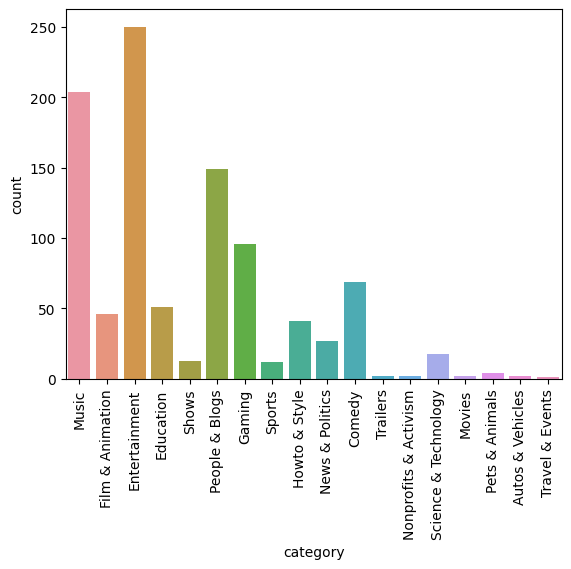

                      Country  Ratio
Country                             
United States             313 31.457
India                     198 19.899
Brazil                     66  6.633
United Kingdom             43  4.322
Mexico                     38  3.819
Indonesia                  31  3.116
USA                        27  2.714
Spain                      24  2.412
Russia                     23  2.312
Thailand                   18  1.809
Canada                     17  1.709
South Korea                17  1.709
Argentina                  14  1.407
Philippines                13  1.307
Colombia                   11  1.106
Ukraine                    10  1.005
Australia                   9  0.905
Saudi Arabia                9  0.905
France                      8  0.804
Germany                     7  0.704
United Arab Emirates        7  0.704
Pakistan                    7  0.704
Turkey                      6  0.603
Japan                       6  0.603
Sweden                      4  0.402
P

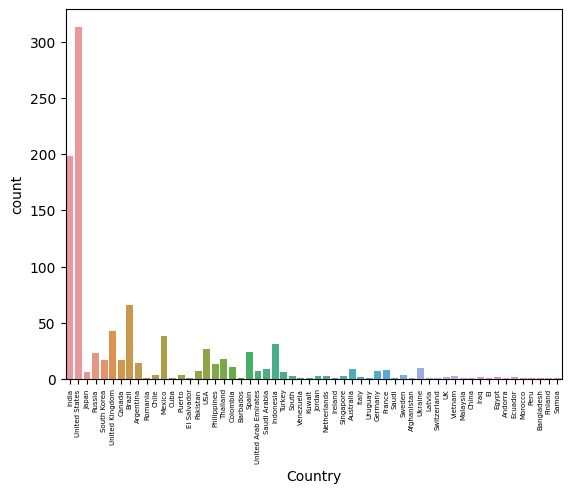

              Abbreviation  Ratio
Abbreviation                     
US                     340 34.171
IN                     198 19.899
BR                      66  6.633
GB                      45  4.523
MX                      38  3.819
ID                      31  3.116
ES                      24  2.412
RU                      23  2.312
TH                      18  1.809
KR                      17  1.709
CA                      17  1.709
AR                      14  1.407
PH                      13  1.307
CO                      11  1.106
UA                      10  1.005
AU                       9  0.905
SA                       9  0.905
FR                       8  0.804
PK                       7  0.704
DE                       7  0.704
AE                       7  0.704
TR                       6  0.603
JP                       6  0.603
Rico                     4  0.402
CL                       4  0.402
SE                       4  0.402
NL                       3  0.302
VN            

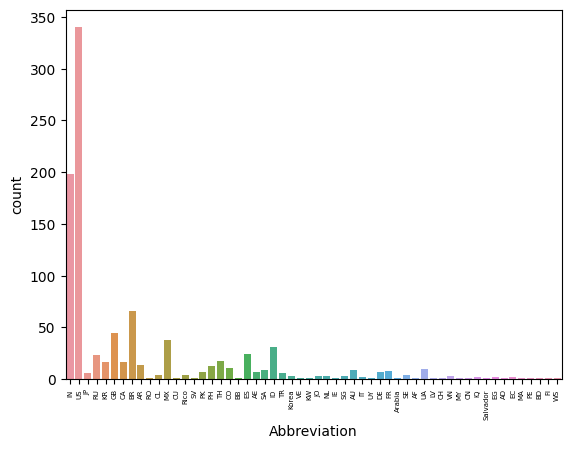

               channel_type  Ratio
channel_type                      
Entertainment           314 31.558
Music                   220 22.111
Games                   101 10.151
People                  101 10.151
Education                51  5.126
Comedy                   51  5.126
Film                     42  4.221
Howto                    37  3.719
News                     31  3.116
Tech                     18  1.809
Sports                   13  1.307
Animals                   4  0.402
Autos                     3  0.302
Nonprofit                 2  0.201
*******************************


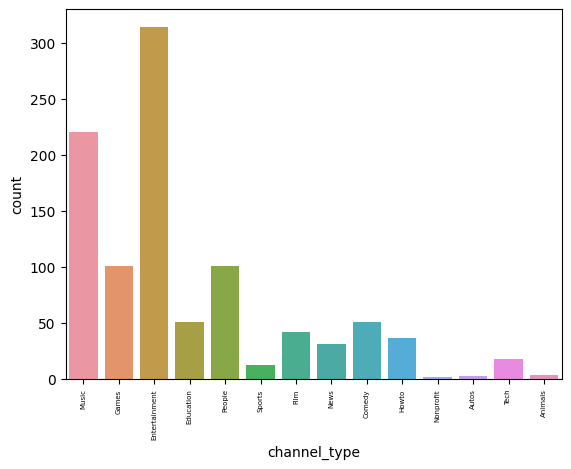

               created_month  Ratio
created_month                      
Jan                      101 10.151
Sep                       96  9.648
Jul                       91  9.146
Nov                       90  9.045
Mar                       87  8.744
May                       84  8.442
Aug                       82  8.241
Oct                       78  7.839
Jun                       73  7.337
Apr                       72  7.236
Dec                       69  6.935
Feb                       67  6.734
*******************************


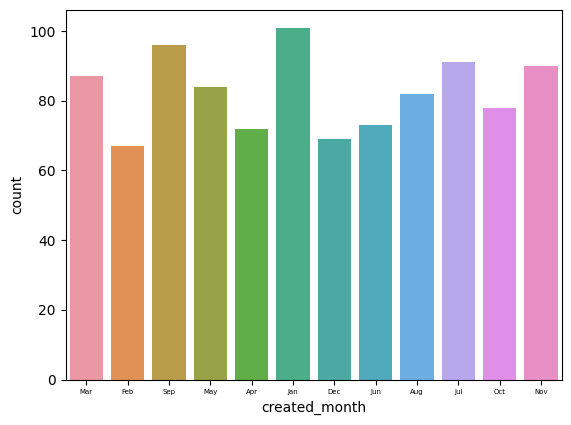

In [69]:
for cat in cat_cols:
    cat_summary(df,cat,plot=True)

********
count   995.000
mean    498.000
std     287.376
min       1.000
5%       50.700
10%     100.400
20%     199.800
30%     299.200
40%     398.600
50%     498.000
60%     597.400
70%     696.800
80%     796.200
90%     895.600
99%     985.060
max     995.000
Name: rank, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


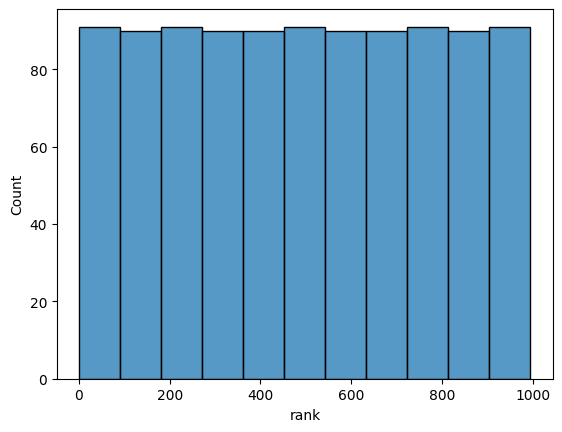

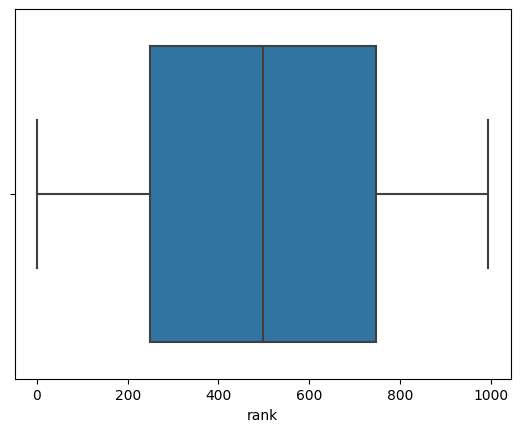

********
count         995.000
mean     22982412.060
std      17526105.341
min      12300000.000
5%       12600000.000
10%      13100000.000
20%      14000000.000
30%      14900000.000
40%      16100000.000
50%      17700000.000
60%      20100000.000
70%      22900000.000
80%      27300000.000
90%      36560000.000
99%      96832000.000
max     245000000.000
Name: subscribers, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


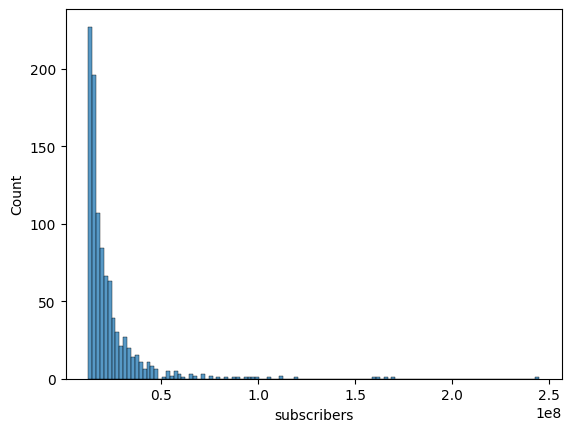

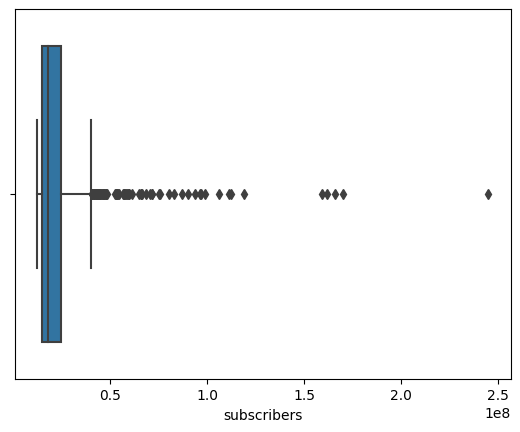

********
count            995.000
mean     11039537052.038
std      14110844376.830
min                0.000
5%        1567942082.900
10%       2227341033.600
20%       3641446595.800
30%       4777033628.200
40%       6296848553.600
50%       7760819588.000
60%       9597016192.800
70%      11678352610.200
80%      15459396836.600
90%      22385385525.800
99%      59448138776.180
max     228000000000.000
Name: video views, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


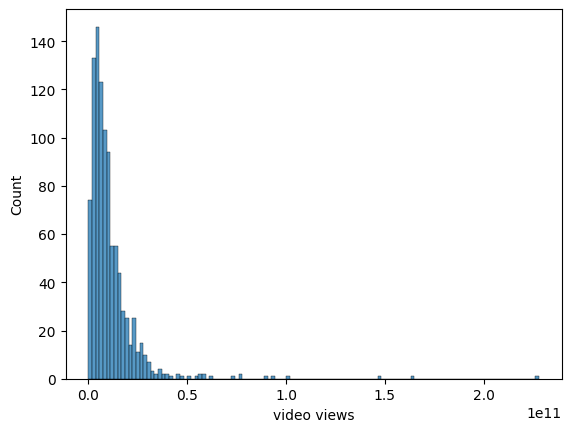

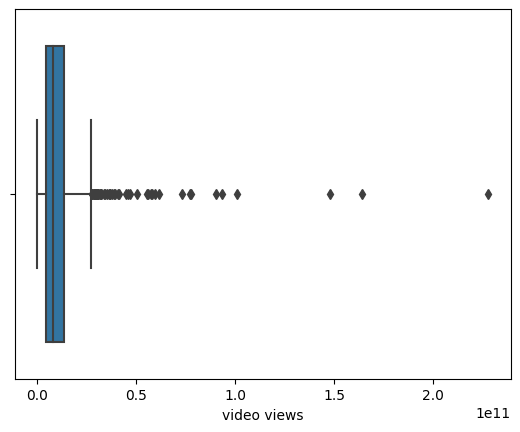

********
count      995.000
mean      9187.126
std      34151.352
min          0.000
5%           1.000
10%          8.000
20%        134.800
30%        279.800
40%        495.000
50%        729.000
60%       1207.600
70%       1840.400
80%       3814.800
90%       9857.200
99%     194312.580
max     301308.000
Name: uploads, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


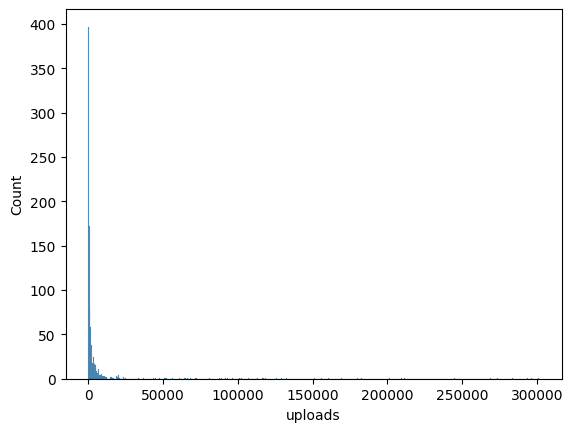

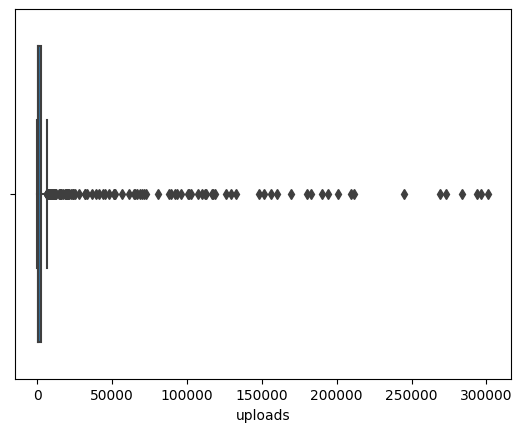

********
count       994.000
mean     554248.904
std     1362782.210
min           1.000
5%           55.650
10%         116.300
20%         244.800
30%         409.800
40%         620.200
50%         915.500
60%        1498.600
70%        2437.900
80%        6095.600
90%     4030287.300
99%     4057944.000
max     4057944.000
Name: video_views_rank, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


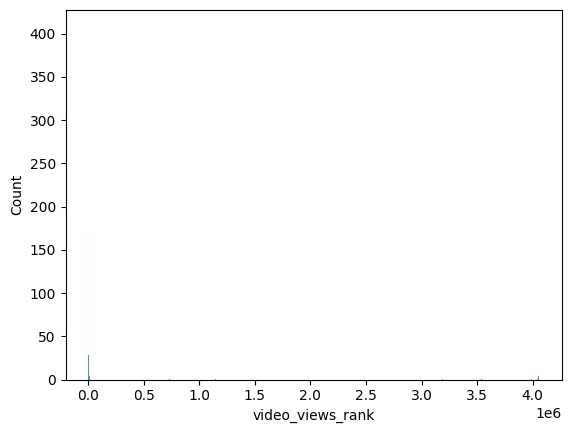

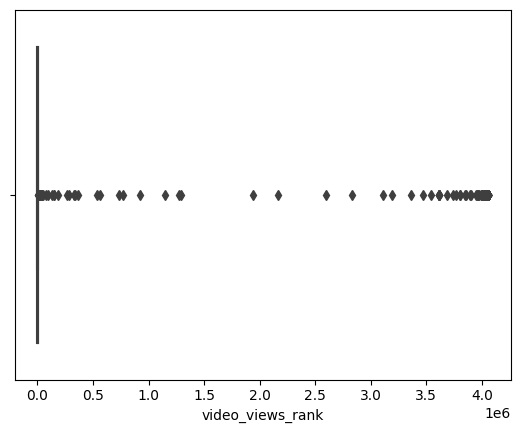

********
count    879.000
mean     386.053
std     1232.245
min        1.000
5%         2.000
10%        3.000
20%        8.000
30%       15.000
40%       29.000
50%       51.000
60%       86.000
70%      110.600
80%      140.000
90%      172.200
99%     7583.020
max     7741.000
Name: country_rank, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


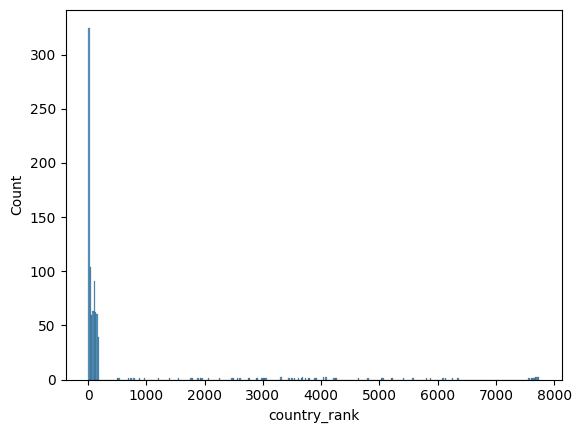

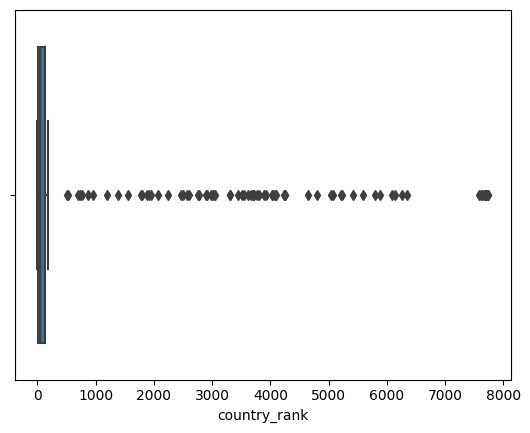

********
count    962.000
mean     745.719
std     1944.387
min        1.000
5%         5.000
10%       10.000
20%       21.000
30%       33.000
40%       45.000
50%       65.500
60%      100.000
70%      130.000
80%      150.000
90%     3838.900
99%     7710.780
max     7741.000
Name: channel_type_rank, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


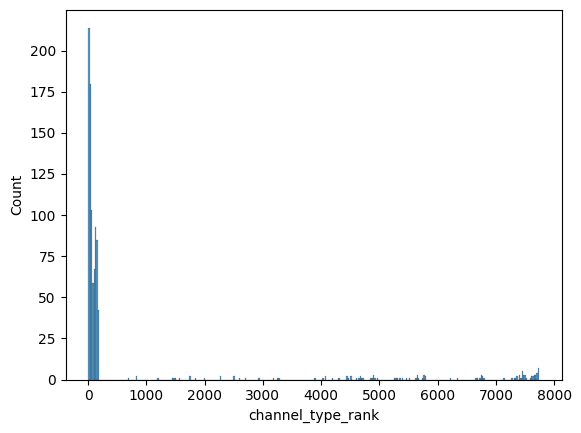

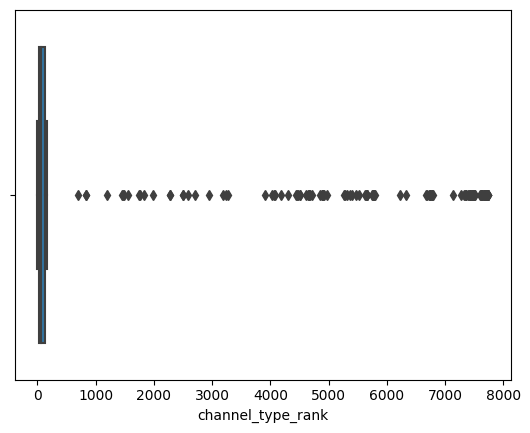

********
count          939.000
mean     175610284.794
std      416378166.207
min              1.000
5%              52.600
10%         314316.800
20%       12742000.000
30%       27138000.000
40%       43892400.000
50%       64085000.000
60%       98339400.000
70%      136987800.000
80%      211628600.000
90%      398842400.000
99%     1691800000.000
max     6589000000.000
Name: video_views_for_the_last_30_days, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


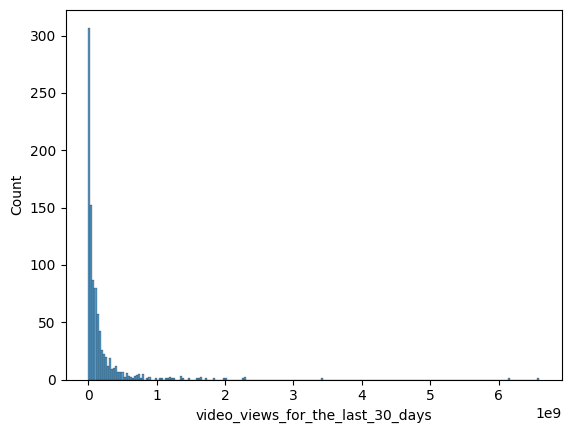

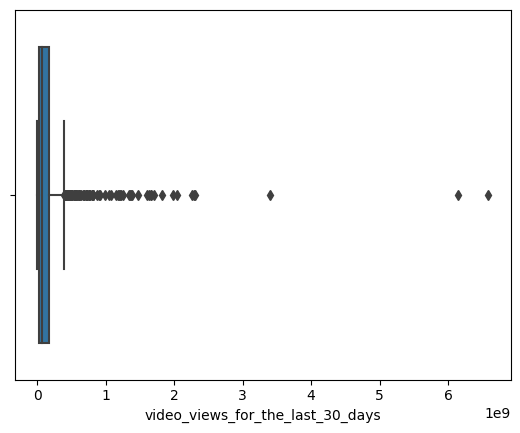

********
count      995.000
mean     36886.148
std      71858.724
min          0.000
5%           0.000
10%          0.000
20%        901.800
30%       4420.000
40%       8460.000
50%      13300.000
60%      21940.000
70%      31640.000
80%      46880.000
90%      89600.000
99%     400146.000
max     850900.000
Name: lowest_monthly_earnings, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


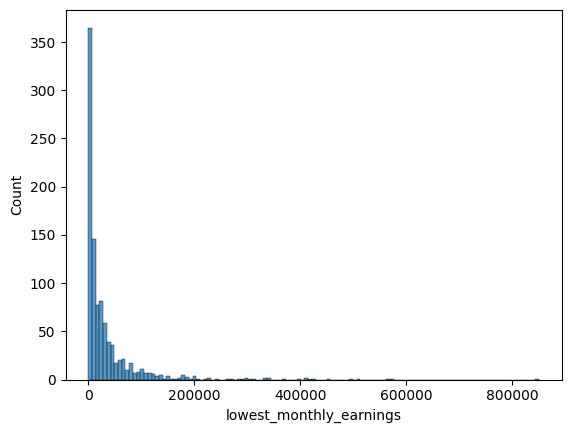

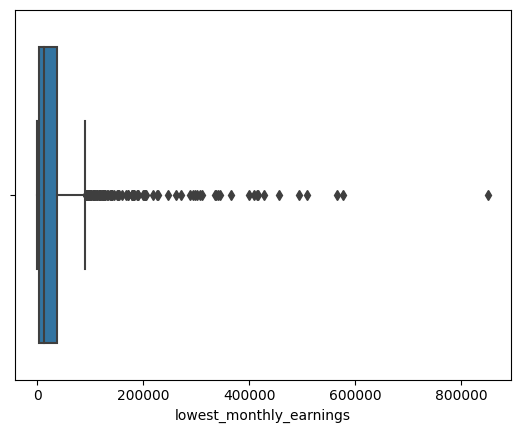

********
count        995.000
mean      589807.848
std      1148622.478
min            0.000
5%             0.000
10%            0.010
20%        14440.000
30%        70680.000
40%       135000.000
50%       212700.000
60%       351080.000
70%       506780.000
80%       749460.000
90%      1400000.000
99%      6406000.000
max     13600000.000
Name: highest_monthly_earnings, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


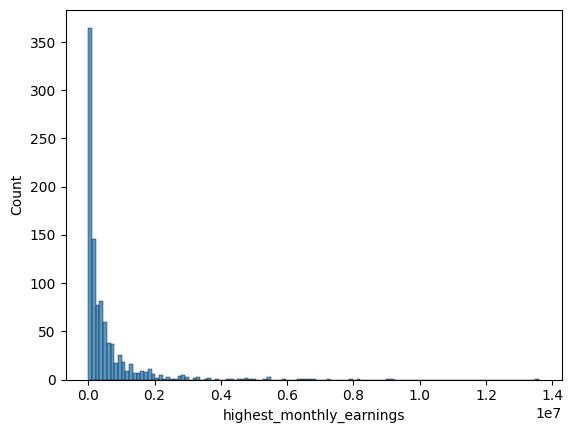

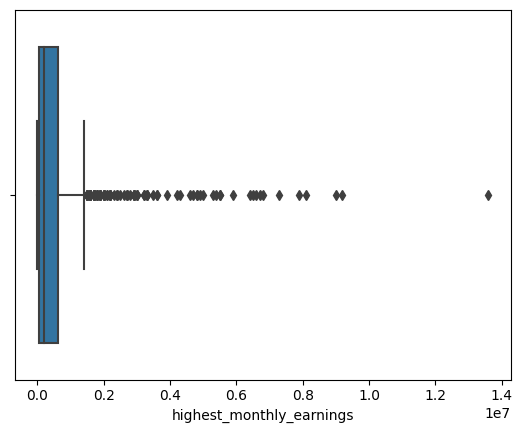

********
count        995.000
mean      442257.393
std       861216.104
min            0.000
5%             0.000
10%            0.010
20%        10860.000
30%        53000.000
40%       101220.000
50%       159500.000
60%       263340.000
70%       380120.000
80%       562100.000
90%      1100000.000
99%      4806000.000
max     10200000.000
Name: lowest_yearly_earnings, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


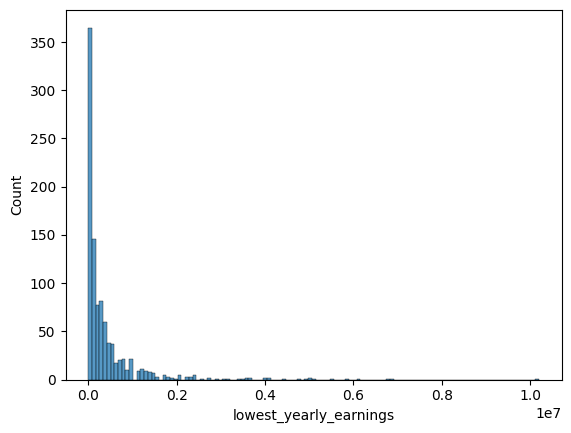

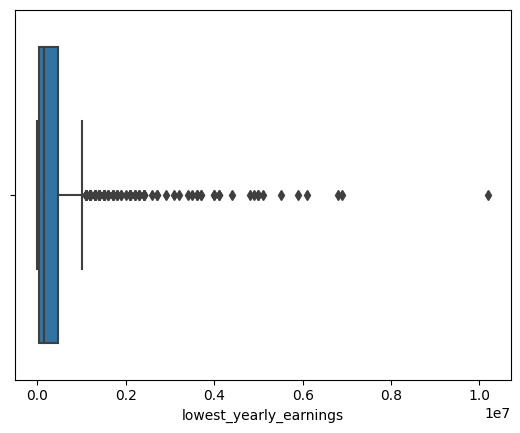

********
count         995.000
mean      7081813.920
std      13797037.615
min             0.000
5%              0.000
10%             0.140
20%        173100.000
30%        847620.000
40%       1600000.000
50%       2600000.000
60%       4200000.000
70%       6080000.000
80%       9020000.000
90%      17240000.000
99%      76808000.000
max     163400000.000
Name: highest_yearly_earnings, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


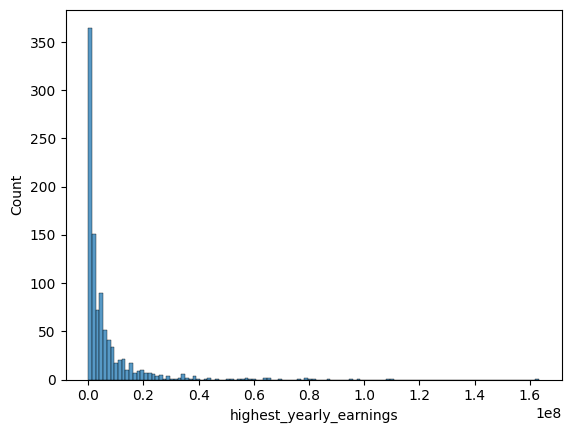

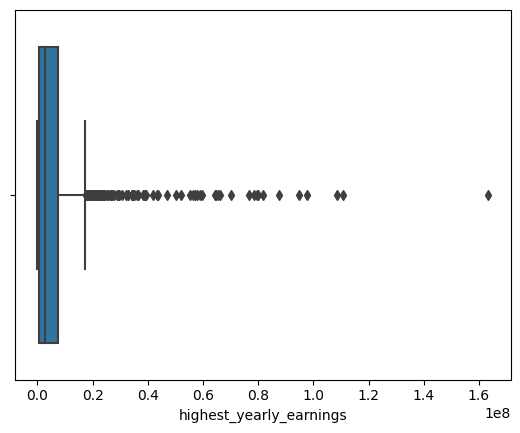

********
count       658.000
mean     349079.132
std      614355.441
min           1.000
5%           10.000
10%      100000.000
20%      100000.000
30%      100000.000
40%      100000.000
50%      200000.000
60%      200000.000
70%      300000.000
80%      500000.000
90%      800000.000
99%     3086000.000
max     8000000.000
Name: subscribers_for_last_30_days, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


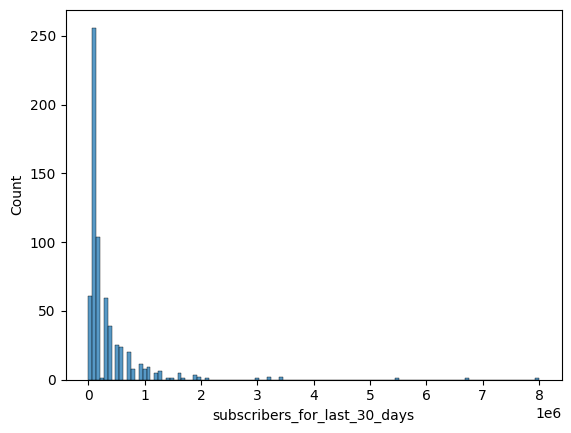

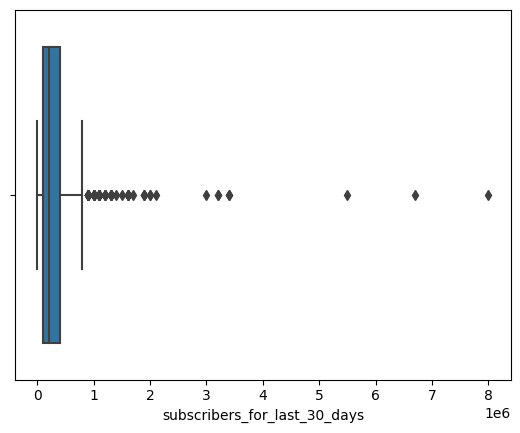

********
count    990.000
mean    2012.630
std        4.513
min     1970.000
5%      2006.000
10%     2006.000
20%     2008.000
30%     2010.000
40%     2012.000
50%     2013.000
60%     2014.000
70%     2015.000
80%     2017.000
90%     2018.000
99%     2021.000
max     2022.000
Name: created_year, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


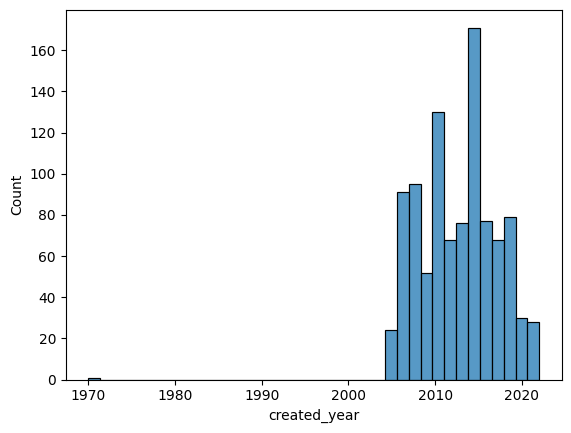

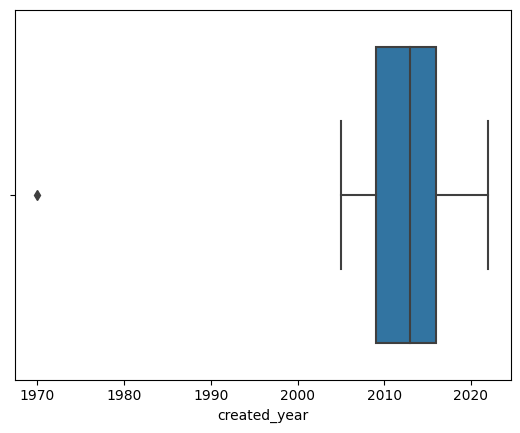

********
count   990.000
mean     15.746
std       8.778
min       1.000
5%        2.000
10%       4.000
20%       7.000
30%       9.000
40%      13.000
50%      16.000
60%      19.000
70%      22.000
80%      25.000
90%      28.000
99%      31.000
max      31.000
Name: created_date, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


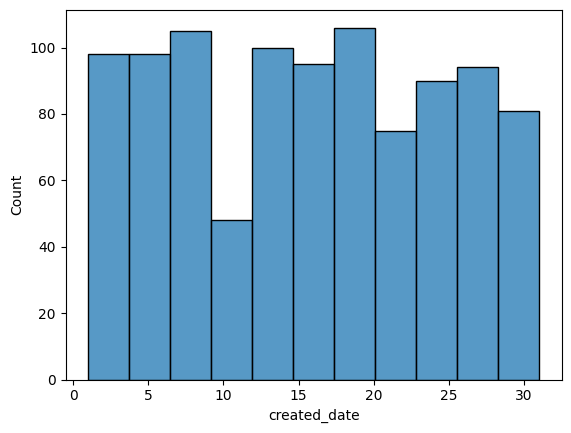

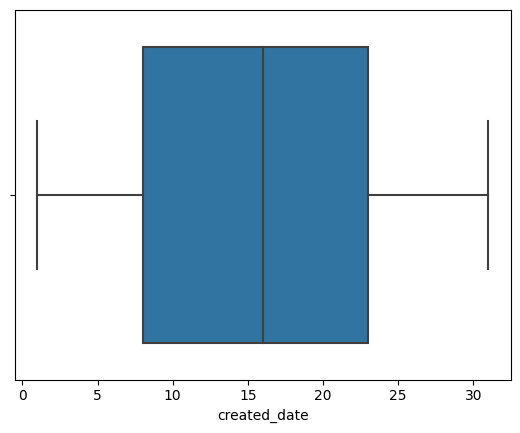

********
count   938.000
mean     62.363
std      26.304
min       7.600
5%       28.100
10%      28.100
20%      28.100
30%      40.200
40%      51.300
50%      65.500
60%      88.200
70%      88.200
80%      88.200
90%      88.200
99%      94.300
max     113.100
Name: Gross tertiary education enrollment (%), dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


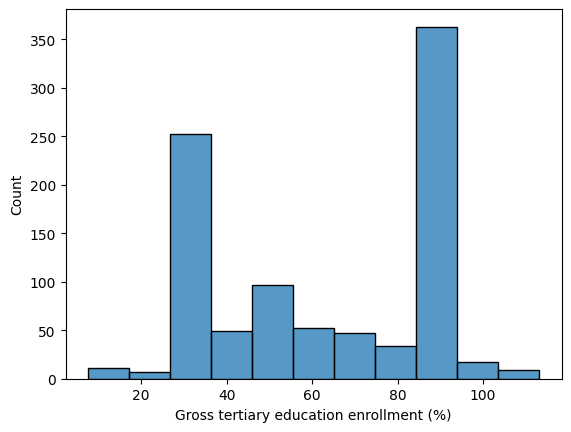

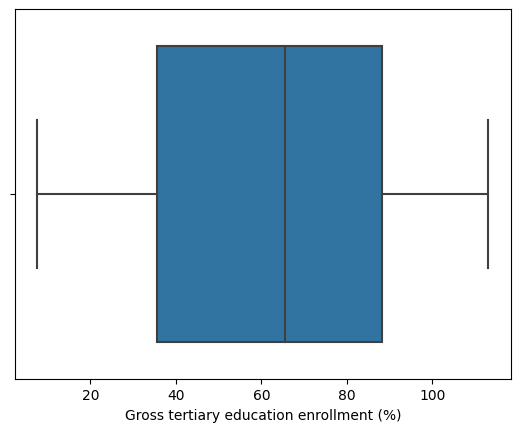

********
count          938.000
mean     448629682.609
std      489148611.330
min         202506.000
5%        34268528.000
10%       44938712.000
20%       66834405.000
30%      126014024.000
40%      212559417.000
50%      328239523.000
60%      328239523.000
70%      328239523.000
80%     1366417754.000
90%     1366417754.000
99%     1366417754.000
max     1397715000.000
Name: Population, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


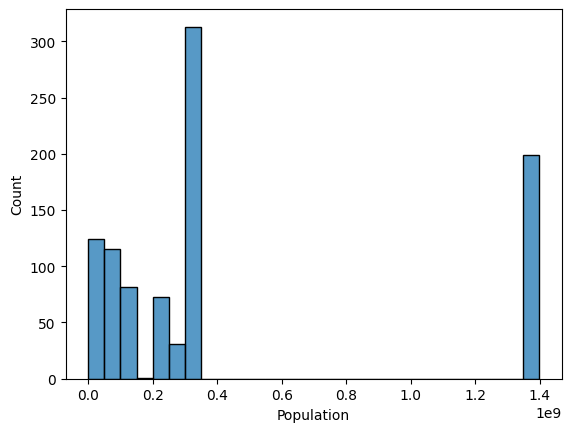

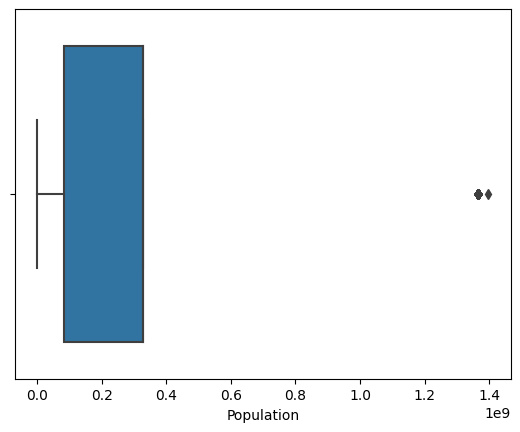

********
count   938.000
mean      9.064
std       4.838
min       0.750
5%        2.350
10%       3.420
20%       4.590
30%       5.360
40%       5.360
50%       7.090
60%      12.080
70%      14.700
80%      14.700
90%      14.700
99%      14.700
max      14.720
Name: Unemployment rate, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


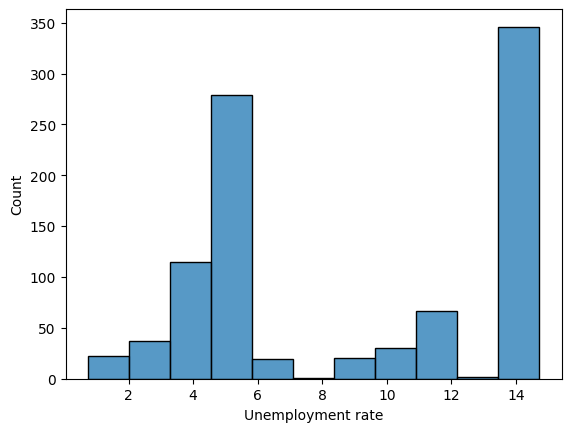

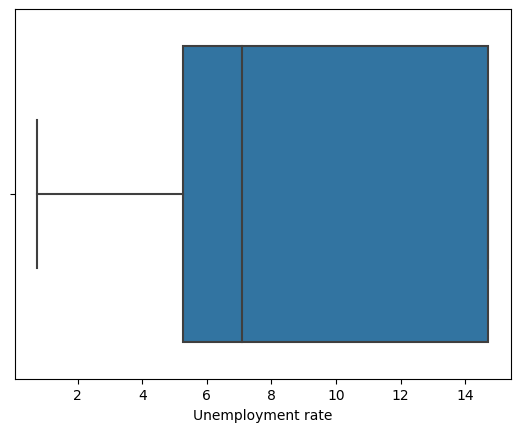

********
count         938.000
mean    227033194.677
std     157947248.793
min         35588.000
5%       25356143.350
10%      35294600.000
20%      50975903.000
30%     102626859.000
40%     183241641.000
50%     270663028.000
60%     270663028.000
70%     270663028.000
80%     471031528.000
90%     471031528.000
99%     471031528.000
max     842933962.000
Name: Urban_population, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


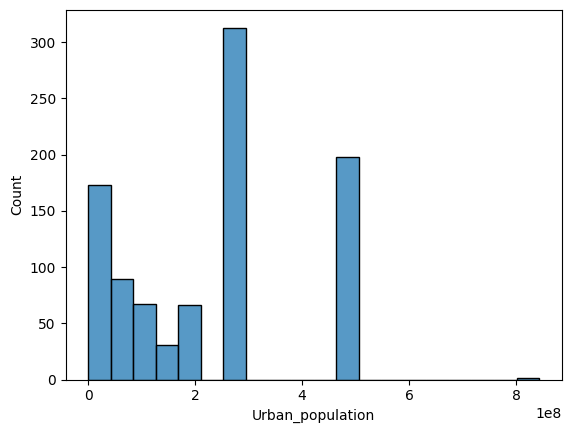

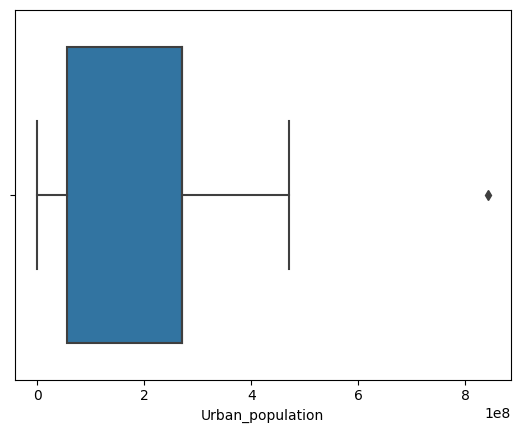

********
count   938.000
mean     26.540
std      20.670
min     -38.416
5%      -14.235
10%     -10.561
20%      20.594
30%      20.594
40%      20.594
50%      36.056
60%      37.090
70%      37.090
80%      37.090
90%      51.166
99%      61.524
max      61.924
Name: Latitude, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


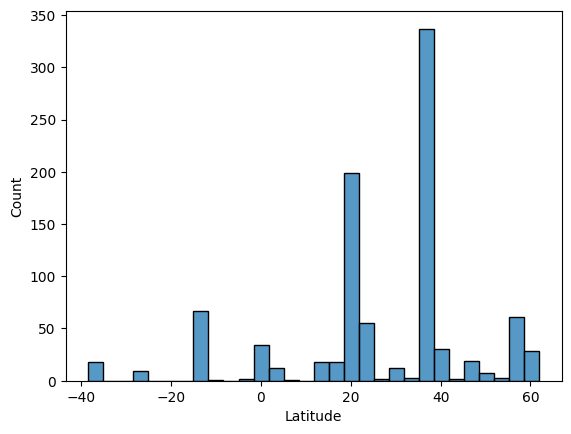

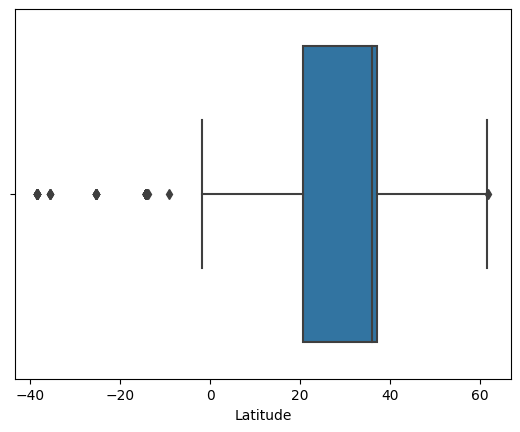

********
count    938.000
mean     -10.094
std       85.053
min     -172.105
5%      -102.553
10%      -95.713
20%      -95.713
30%      -95.713
40%      -74.297
50%      -51.925
60%       18.644
70%       78.963
80%       78.963
90%      105.319
99%      133.775
max      138.253
Name: Longitude, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


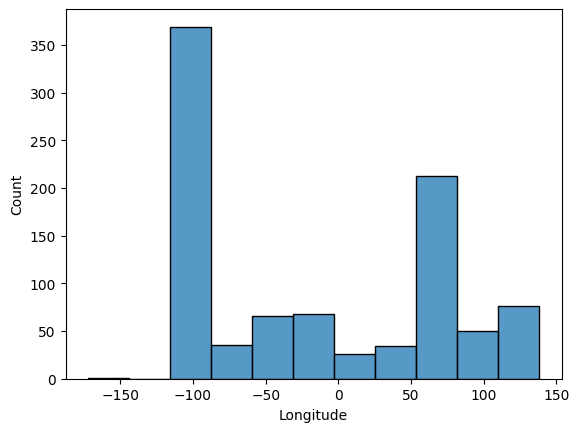

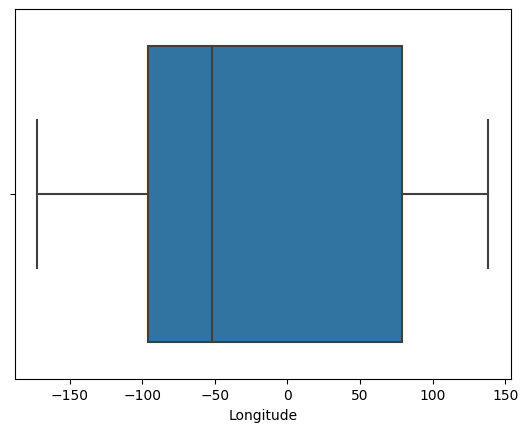

In [70]:
for col in num_cols:
    num_summary(df,col,plot=True)

# Checking Normality of data

In [71]:
#Importing statistical libraries
import pylab 
import scipy.stats as stats

## QQ Plot


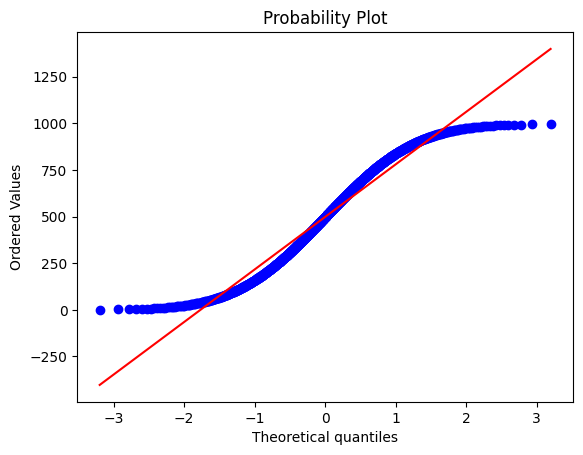

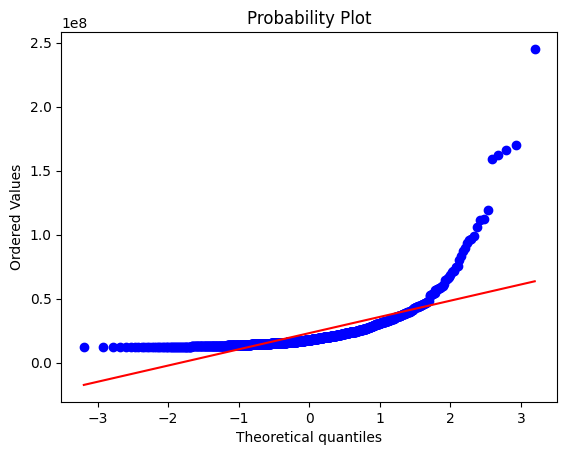

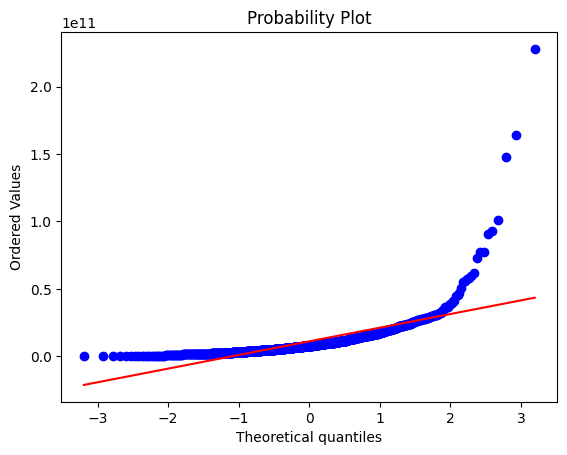

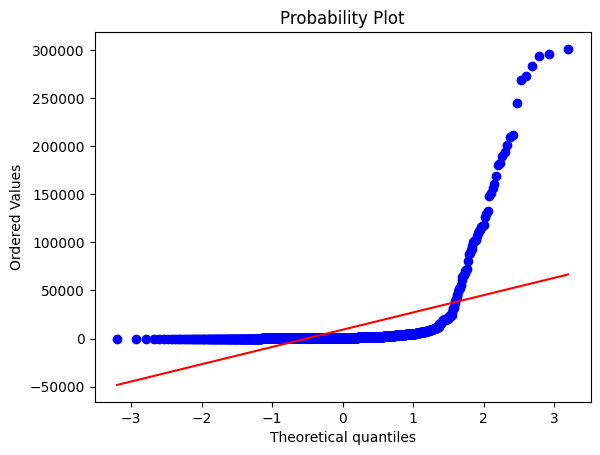

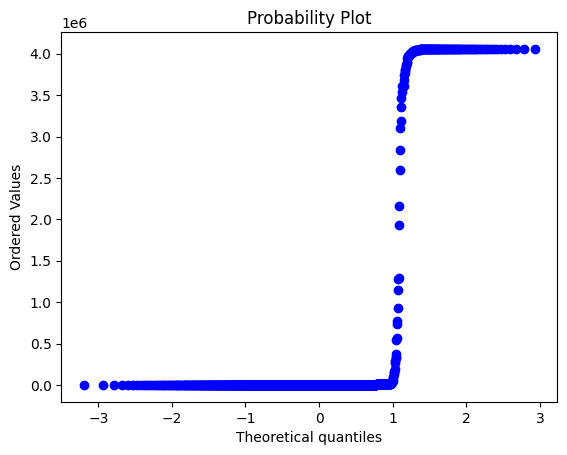

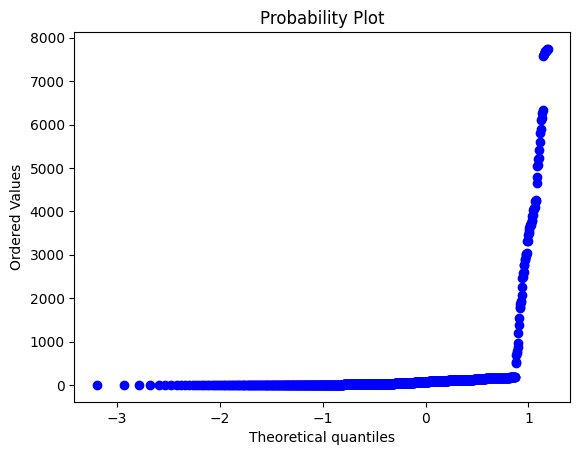

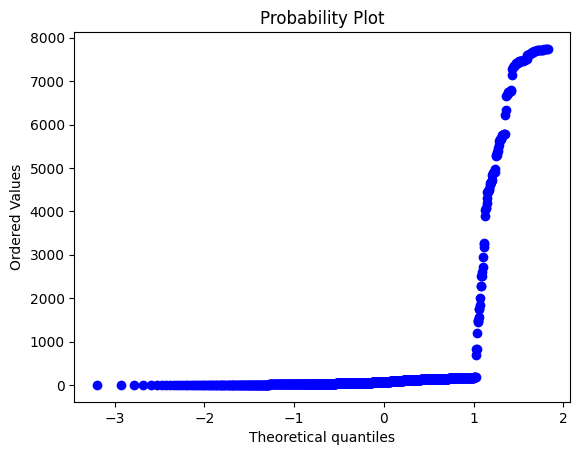

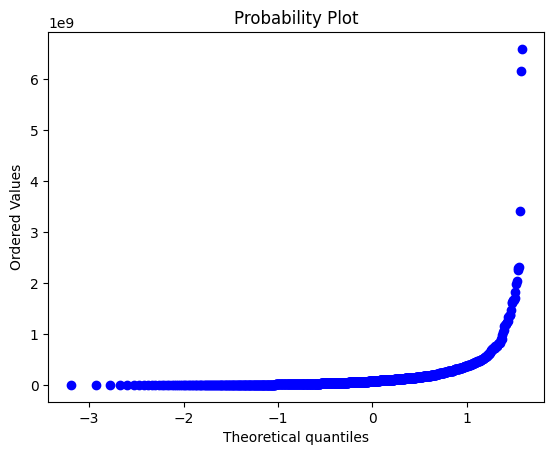

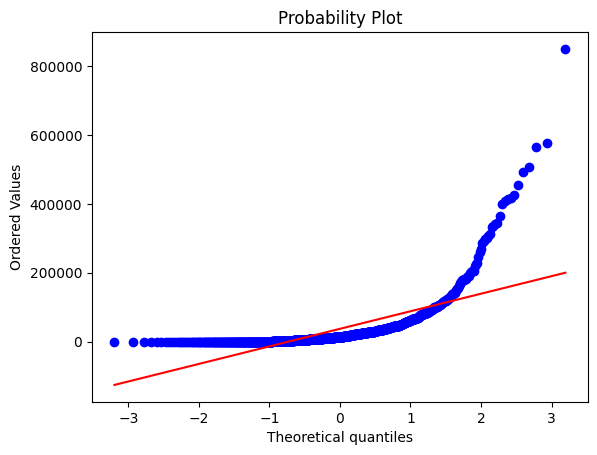

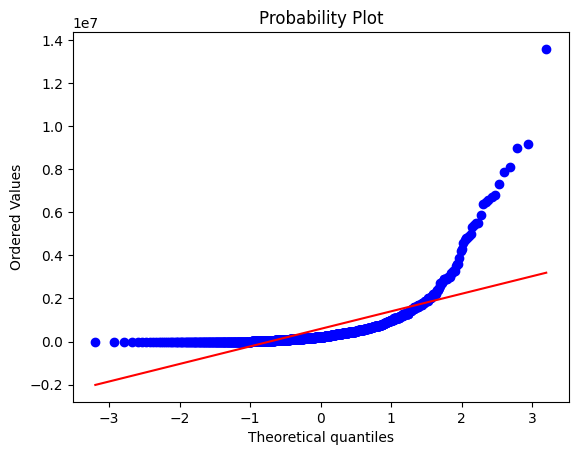

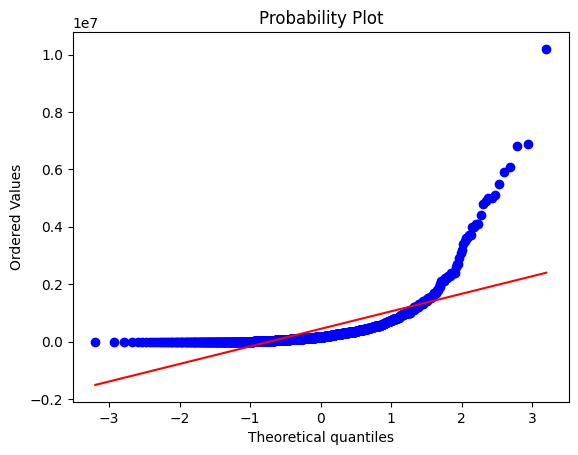

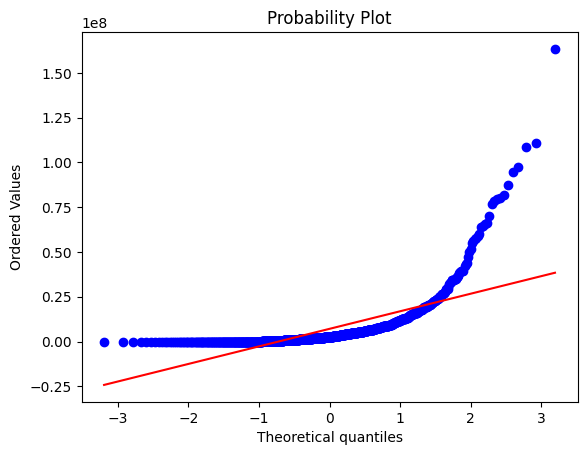

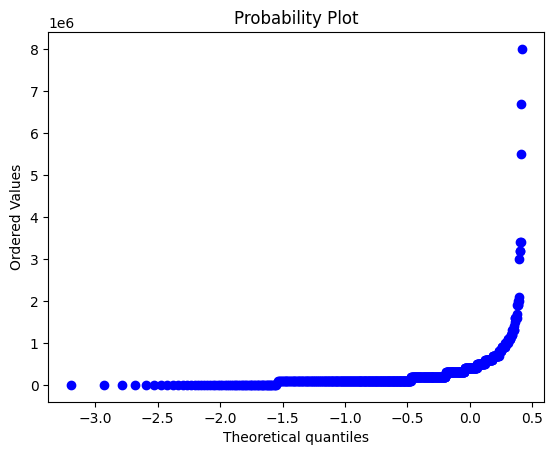

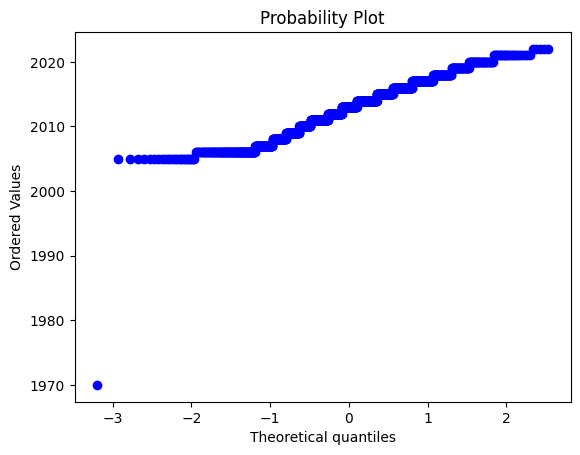

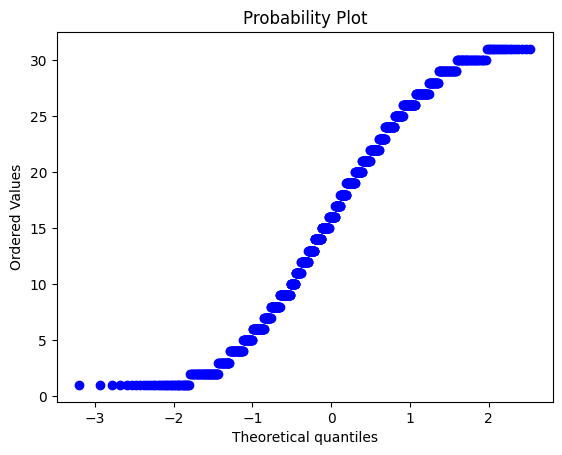

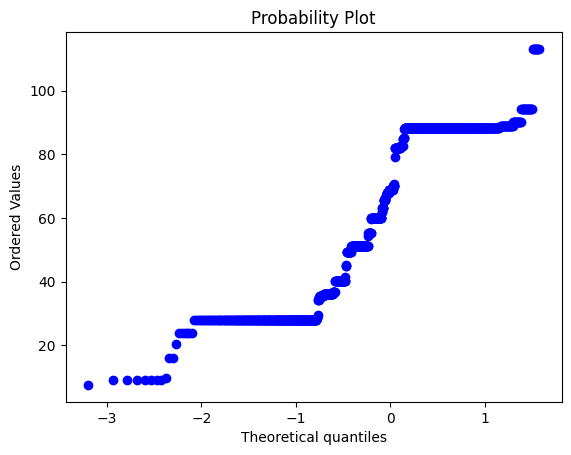

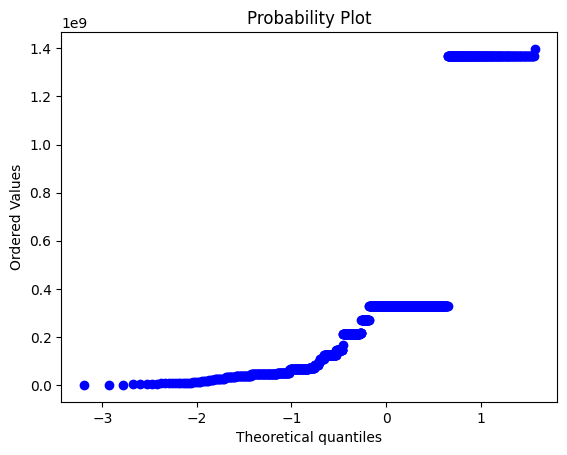

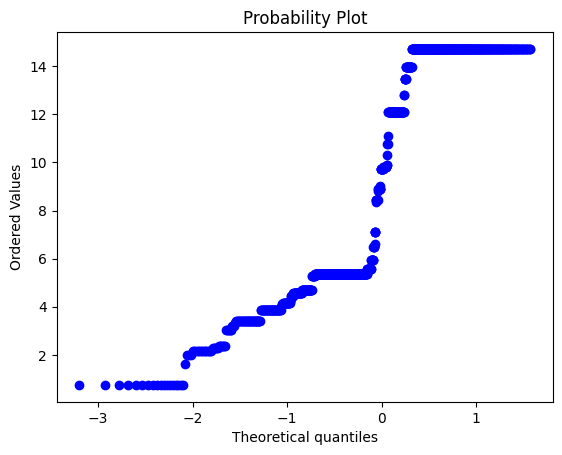

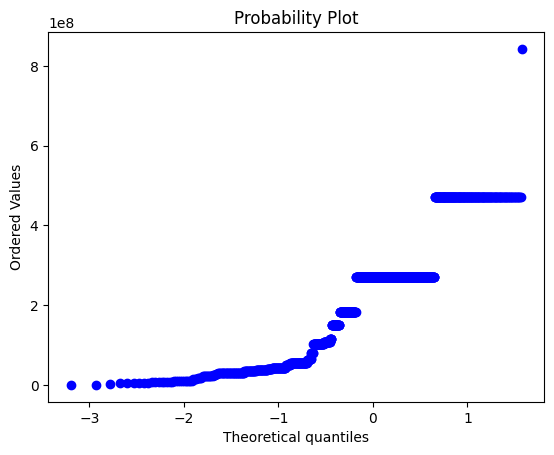

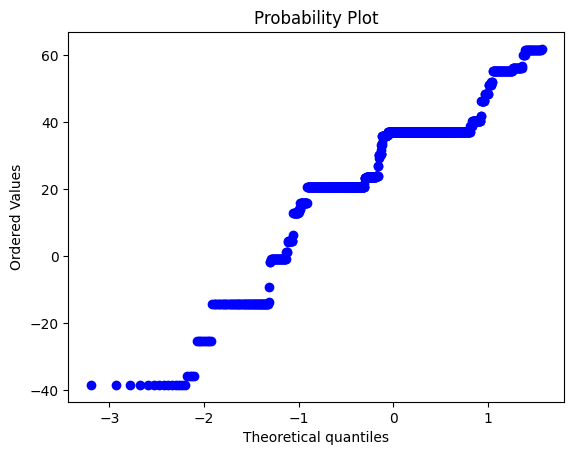

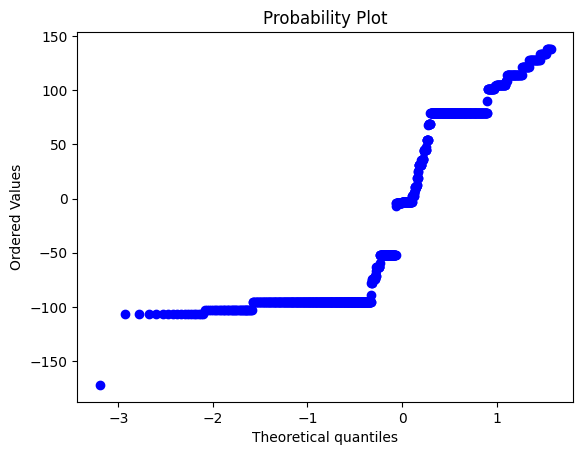

In [72]:
for col in num_cols:
    stats.probplot(df[col],dist="norm",plot=plt)
    plt.show()

In [ ]:
#If points were close to line it would be normally distributed.

## Histogram

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


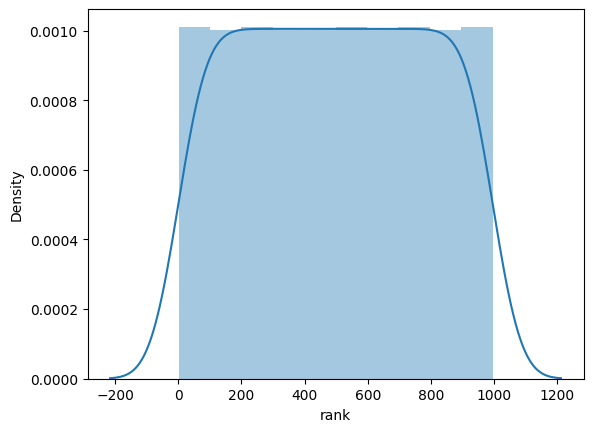

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


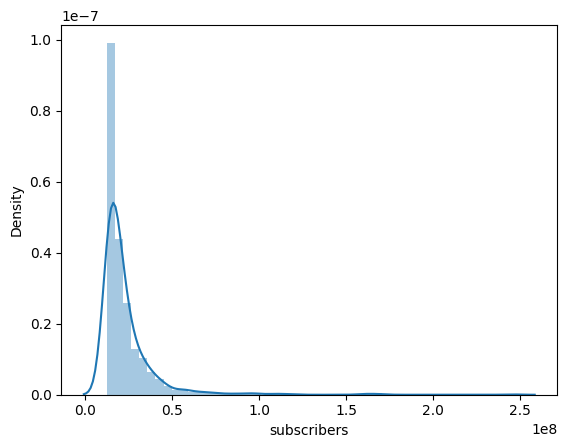

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


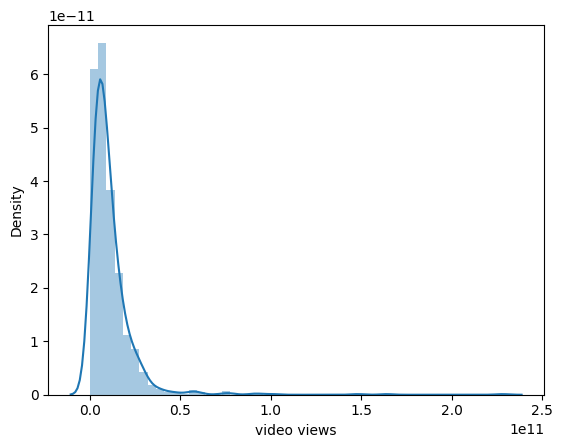

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


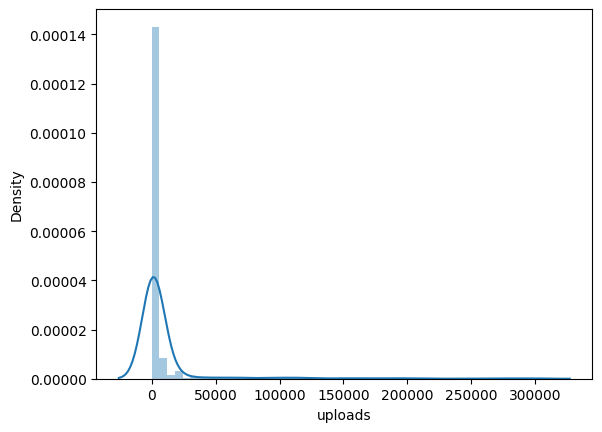

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


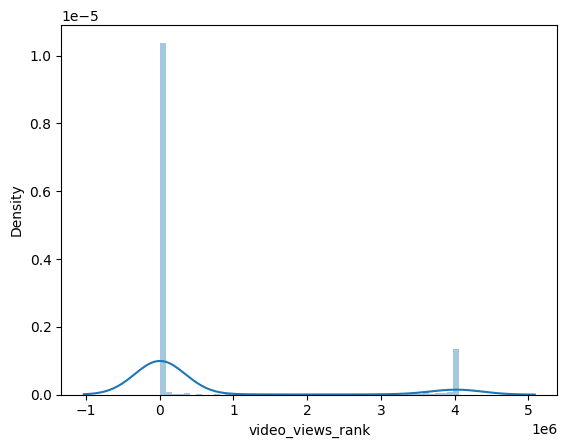

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


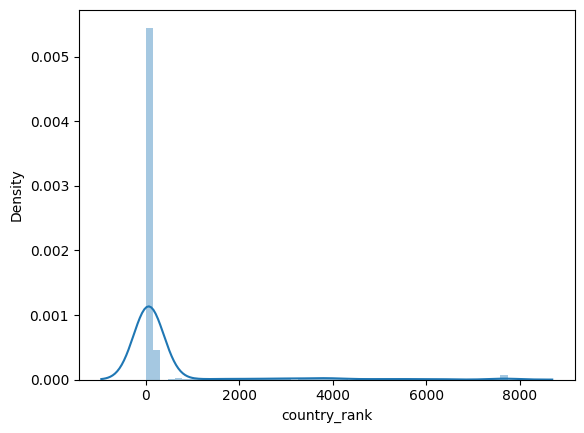

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


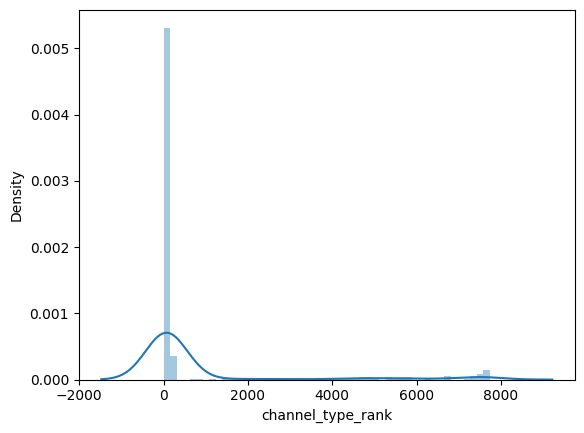

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


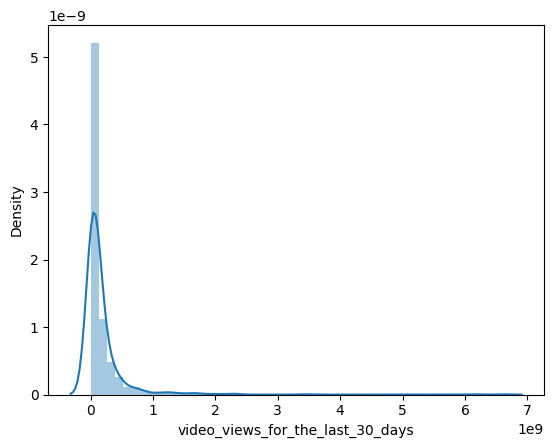

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


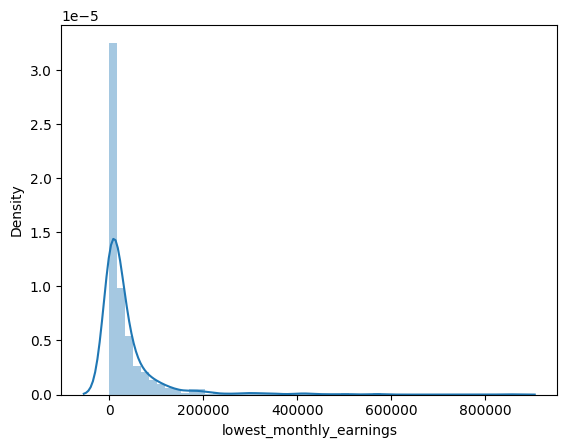

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


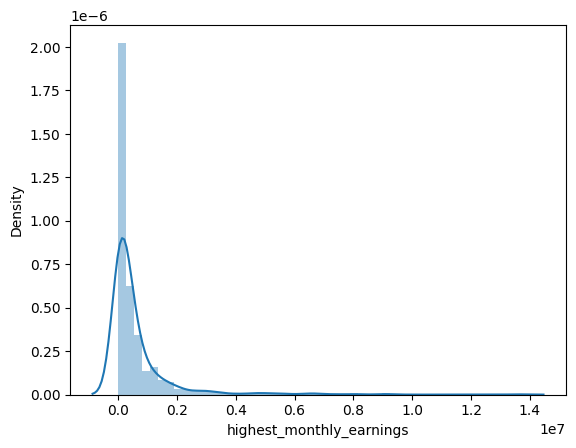

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


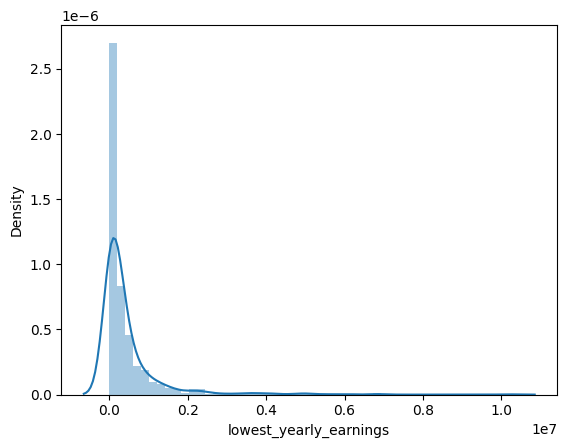

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


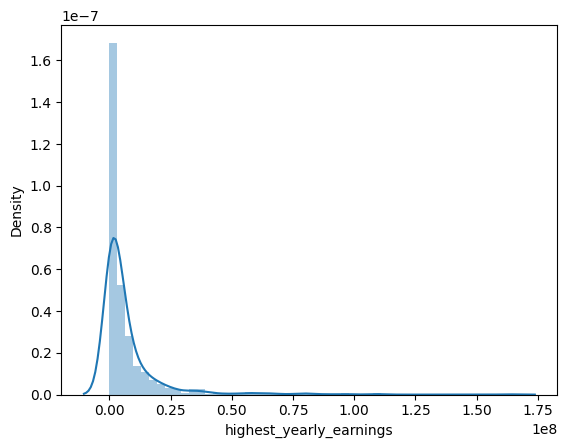

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


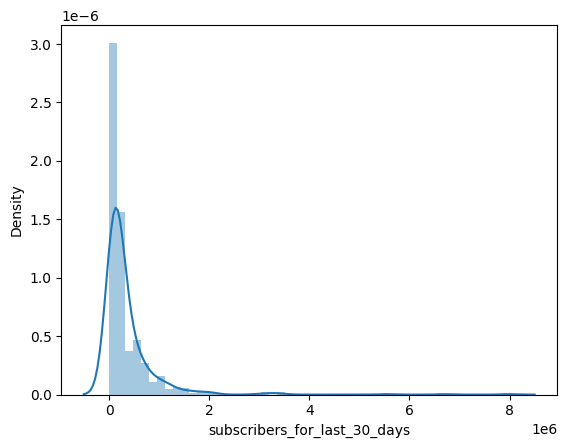

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


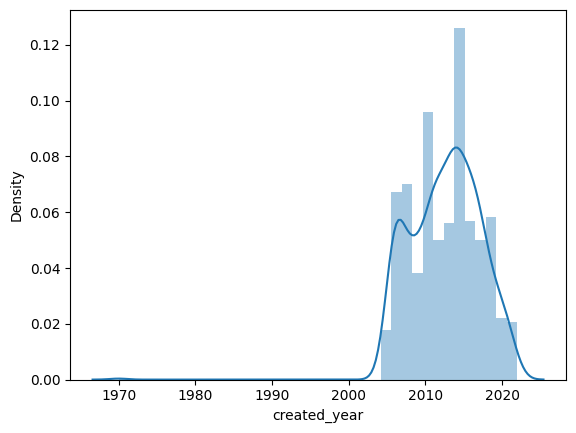

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


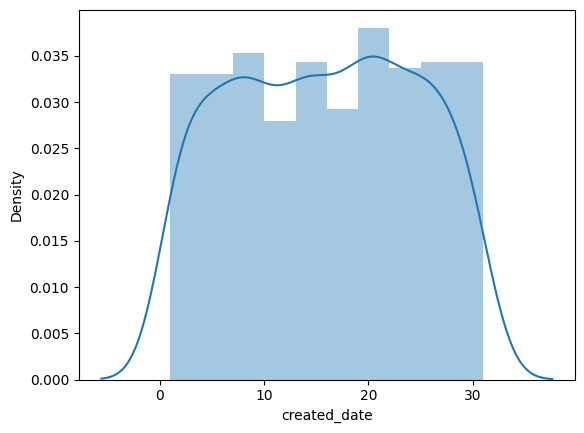

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


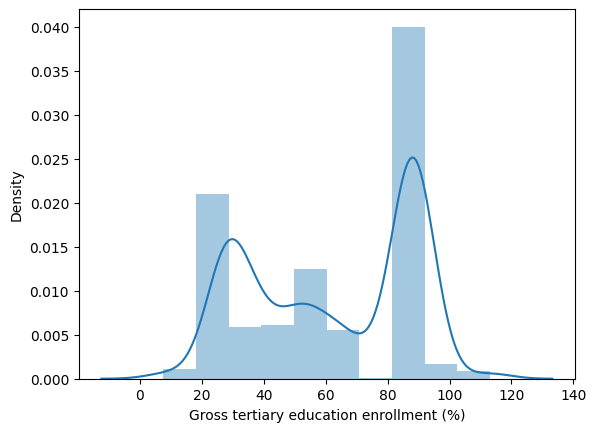

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


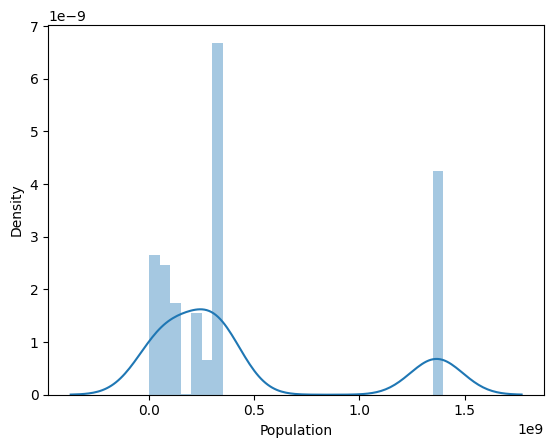

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


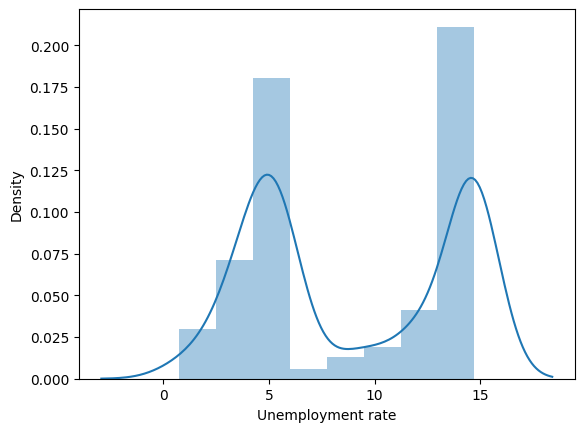

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


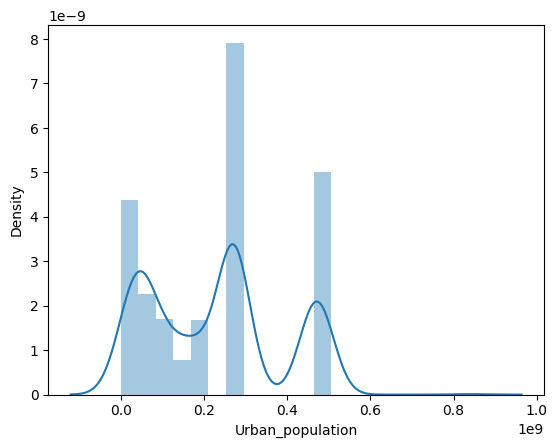

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


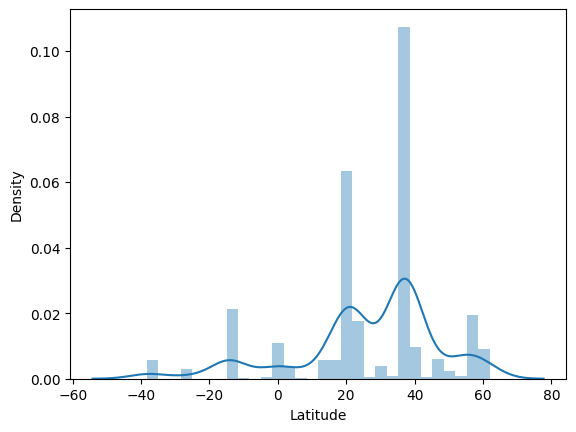

/tmp/ipykernel_33/1756116647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


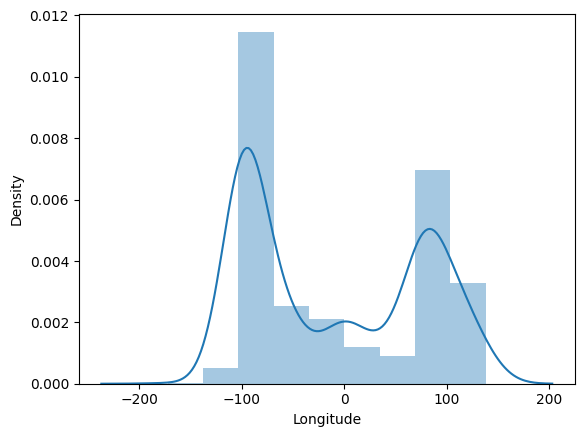

In [73]:
for col in num_cols:
    sns.distplot(df[col])
    plt.show()

In [74]:
from scipy.stats import shapiro #With this test i can observe weather values are normal or not.

for i in num_cols:
  statistic,p_value=shapiro(df[i])
  print(f"{i}:","Test statstic=%.4f,p_value=%.4f" % (statistic,p_value))

rank: Test statstic=0.9548,p_value=0.0000
subscribers: Test statstic=0.5234,p_value=0.0000
video views: Test statstic=0.5172,p_value=0.0000
uploads: Test statstic=0.2777,p_value=0.0000
video_views_rank: Test statstic=nan,p_value=1.0000
country_rank: Test statstic=nan,p_value=1.0000
channel_type_rank: Test statstic=nan,p_value=1.0000
video_views_for_the_last_30_days: Test statstic=nan,p_value=1.0000
lowest_monthly_earnings: Test statstic=0.5052,p_value=0.0000
highest_monthly_earnings: Test statstic=0.5053,p_value=0.0000
lowest_yearly_earnings: Test statstic=0.5053,p_value=0.0000
highest_yearly_earnings: Test statstic=0.5052,p_value=0.0000
subscribers_for_last_30_days: Test statstic=nan,p_value=1.0000
created_year: Test statstic=nan,p_value=1.0000
created_date: Test statstic=nan,p_value=1.0000
Gross tertiary education enrollment (%): Test statstic=nan,p_value=1.0000
Population: Test statstic=nan,p_value=1.0000
Unemployment rate: Test statstic=nan,p_value=1.0000
Urban_population: Test sta

In [ ]:
# ıf p_value smaller than 0.05 it means we can reject the null hypothesis that means that we can assume that distribution is not normal.

## D'Agostino's K-squared Test

In [75]:
from scipy.stats import normaltest #Another normality test to chech normality of data

for i  in num_cols:
    stat, p = normaltest(df[i])
    print(f"{i}:","Test statstic=%.3f,p_value=%.3f\n" % (stat,p_value))


rank: Test statstic=731.664,p_value=1.000

subscribers: Test statstic=1118.057,p_value=1.000

video views: Test statstic=1340.429,p_value=1.000

uploads: Test statstic=1109.200,p_value=1.000

video_views_rank: Test statstic=nan,p_value=1.000

country_rank: Test statstic=nan,p_value=1.000

channel_type_rank: Test statstic=nan,p_value=1.000

video_views_for_the_last_30_days: Test statstic=nan,p_value=1.000

lowest_monthly_earnings: Test statstic=1002.287,p_value=1.000

highest_monthly_earnings: Test statstic=1001.930,p_value=1.000

lowest_yearly_earnings: Test statstic=1003.118,p_value=1.000

highest_yearly_earnings: Test statstic=1002.391,p_value=1.000

subscribers_for_last_30_days: Test statstic=nan,p_value=1.000

created_year: Test statstic=nan,p_value=1.000

created_date: Test statstic=nan,p_value=1.000

Gross tertiary education enrollment (%): Test statstic=nan,p_value=1.000

Population: Test statstic=nan,p_value=1.000

Unemployment rate: Test statstic=nan,p_value=1.000

Urban_popul

In [ ]:
#According to test, we made 11 test so we should multiply alfa value to define new alfa value which is 0.55 and according to D'Agostino's K-squared Test
#data has normal distribution because p value >0.55 in each test.But when we consider shapiro wilks,qqplot and histogram.We can see that distribution
# is not normal.

# Correlation

<Axes: title={'center': 'Correlation matrix for Numeric Features'}>

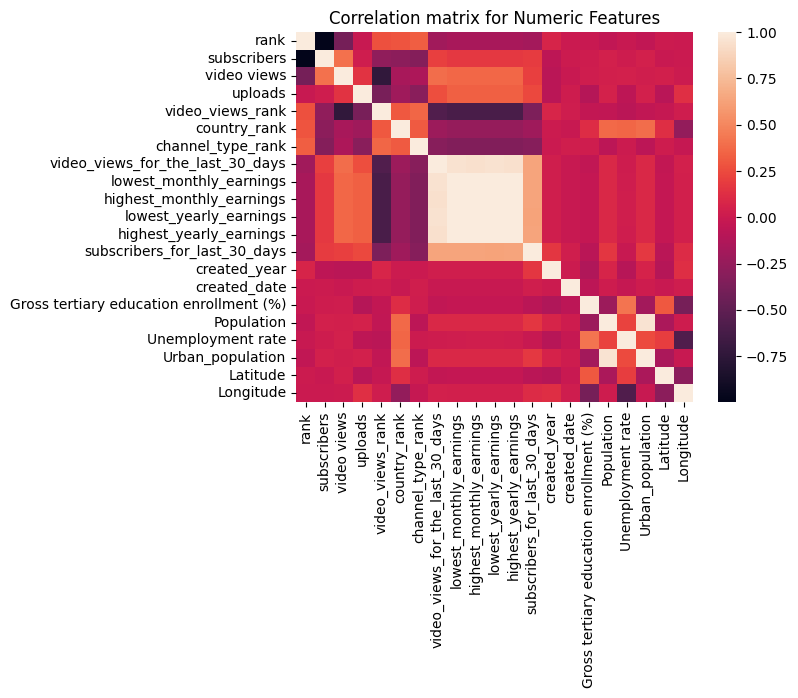

In [77]:
correlation_matrix=df[num_cols].corr(method="kendall") #While data has many outliners and has no normal distribution i choose Kendall
plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Videofeatures")

plt.ylabel("Video features")
sns.heatmap(correlation_matrix,annot=False)

# Using KNN to fill missing values

In [ ]:
#To complete missing numerical values i will use knn impute method.Before using knn imput i need to define amount of neighbours.

## Defining KNN imputer

In [78]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [79]:
df1 = df[df['subscribers_for_last_30_days'].notna()] #I copy dataset according to 'subscribers_for_last_30_days' values.

In [80]:
MMS = MaxAbsScaler() #Define label encoder
model = KMeans() #Define KMeans

for col in num_cols:
    df1.loc[:,col] = np.array(df1[col].fillna(0)).reshape(-1,1)


In [81]:
df[num_cols].head()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,245000000,228000000000.000,20082,1.000,1.000,1.000,2258000000.000,564600.000,9000000.000,6800000.000,108400000.000,2000000.000,2006.000,13.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963
1,2,170000000,0.000,1,4055159.000,7670.000,7423.000,12.000,0.000,0.050,0.040,0.580,NaN,2006.000,5.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
2,3,166000000,28368841870.000,741,48.000,1.000,1.000,1348000000.000,337000.000,5400000.000,4000000.000,64700000.000,8000000.000,2012.000,20.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
3,4,162000000,164000000000.000,966,2.000,2.000,1.000,1975000000.000,493800.000,7900000.000,5900000.000,94800000.000,1000000.000,2006.000,1.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
4,5,159000000,148000000000.000,116536,3.000,2.000,2.000,1824000000.000,455900.000,7300000.000,5500000.000,87500000.000,1000000.000,2006.000,20.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963


In [82]:
df1[num_cols].head()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,245000000,228000000000.000,20082,1.000,1.000,1.000,2258000000.000,564600.000,9000000.000,6800000.000,108400000.000,2000000.000,2006.000,13.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963
2,3,166000000,28368841870.000,741,48.000,1.000,1.000,1348000000.000,337000.000,5400000.000,4000000.000,64700000.000,8000000.000,2012.000,20.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
3,4,162000000,164000000000.000,966,2.000,2.000,1.000,1975000000.000,493800.000,7900000.000,5900000.000,94800000.000,1000000.000,2006.000,1.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
4,5,159000000,148000000000.000,116536,3.000,2.000,2.000,1824000000.000,455900.000,7300000.000,5500000.000,87500000.000,1000000.000,2006.000,20.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963
8,9,106000000,90479060027.000,493,630.000,5.000,25.000,48947000.000,12200.000,195800.000,146800.000,2300000.000,100000.000,2016.000,14.000,81.900,144373535.000,4.590,107683889.000,61.524,105.319


In [83]:
total_cat = cat_but_car + cat_cols #Define new categorical data

In [84]:
df1=df1.drop(columns=total_cat) #I drop all non categorical columns

In [85]:
for col in num_but_cat:
    df1.loc[:,col] = np.array(df1[col].fillna(0)).reshape(-1,1)

In [86]:
model.fit(df1); #I train model

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [87]:
label = model.predict(df1)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, The Silhouette Coefficient is 0.8759847200514886


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, The Silhouette Coefficient is 0.7019506174191811


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, The Silhouette Coefficient is 0.6280362884310106


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, The Silhouette Coefficient is 0.5529919085073502


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, The Silhouette Coefficient is 0.5527710276394581


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, The Silhouette Coefficient is 0.5459853058447877


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, The Silhouette Coefficient is 0.5318483910730563


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=9, The Silhouette Coefficient is 0.5341335356333965


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=10, The Silhouette Coefficient is 0.4926235880319661


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=11, The Silhouette Coefficient is 0.4905869642367465


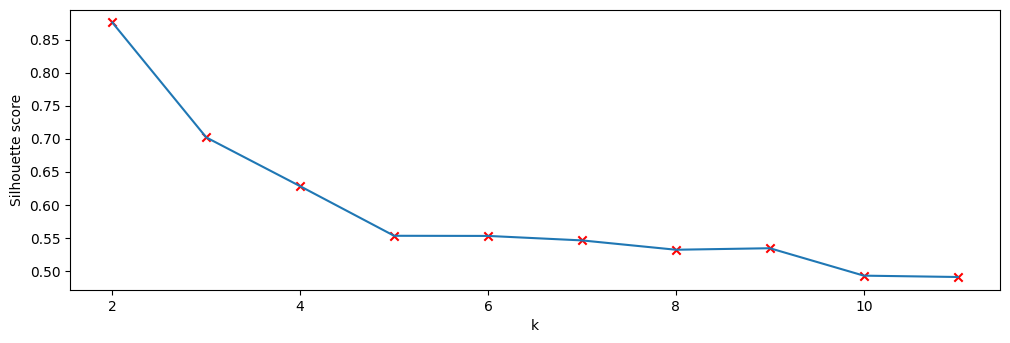

In [88]:
silhouettes = [] #Silhoutte score is used as evaluation metric
ks = list(range(2, 12)) #I define range between 2 and 12.
for n_cluster in ks:
    kmeans = KMeans(n_clusters=n_cluster).fit(df1)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df1, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    silhouettes.append(sil_coeff)

plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.scatter(ks, silhouettes, marker='x', c='r')
plt.plot(ks, silhouettes)
plt.xlabel('k')
plt.ylabel('Silhouette score');

In [ ]:
#So ı can chose ideally 2 or 3 for my model, i can use max 4 in my model.

## Filling with KNN imputer

In [89]:
df2=df.drop(columns=total_cat)#Drop all categorical data

In [95]:
dff_num=np.array(df2[num_cols]) #Defining only numerical data

In [98]:
!pip install ycimpute==0.1.1 #I download module

In [99]:
from ycimpute.imputer import knnimput #Import knn imputer
dff = knnimput.KNN(k=2).complete(dff_num) #I complete missing datas using knn imputer

Imputing row 1/995 with 0 missing, elapsed time: 0.208
Imputing row 101/995 with 0 missing, elapsed time: 0.210
Imputing row 201/995 with 2 missing, elapsed time: 0.212
Imputing row 301/995 with 0 missing, elapsed time: 0.214
Imputing row 401/995 with 1 missing, elapsed time: 0.216
Imputing row 501/995 with 8 missing, elapsed time: 0.218
Imputing row 601/995 with 2 missing, elapsed time: 0.220
Imputing row 701/995 with 1 missing, elapsed time: 0.222
Imputing row 801/995 with 1 missing, elapsed time: 0.224
Imputing row 901/995 with 0 missing, elapsed time: 0.225


In [100]:
dff=pd.DataFrame(dff,columns=num_cols) #I create new data frame

In [101]:
dff.isna().sum()

subscribers                                0
video views                                0
uploads                                    0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
Gross tertiary education enrollment (%)    0
Population                                 0
Unemployment rate                          0
Urban_population                           0
Latitude                                   0
Longitude                                  0
dtype: int64

In [102]:
dff.head()

,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,245000000.000,228000000000.000,20082.000,1.000,1.000,1.000,2258000000.000,564600.000,9000000.000,6800000.000,108400000.000,2000000.000,2006.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963
1,170000000.000,0.000,1.000,4055159.000,7670.000,7423.000,12.000,0.000,0.050,0.040,0.580,241283.850,2006.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
2,166000000.000,28368841870.000,741.000,48.000,1.000,1.000,1348000000.000,337000.000,5400000.000,4000000.000,64700000.000,8000000.000,2012.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
3,162000000.000,164000000000.000,966.000,2.000,2.000,1.000,1975000000.000,493800.000,7900000.000,5900000.000,94800000.000,1000000.000,2006.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
4,159000000.000,148000000000.000,116536.000,3.000,2.000,2.000,1824000000.000,455900.000,7300000.000,5500000.000,87500000.000,1000000.000,2006.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963


In [ ]:
df= df.drop(columns=num_cols) #Drom num_cols to concat with predicted values.

In [104]:
df3 = pd.concat([df,dff],axis=1)

<Axes: >

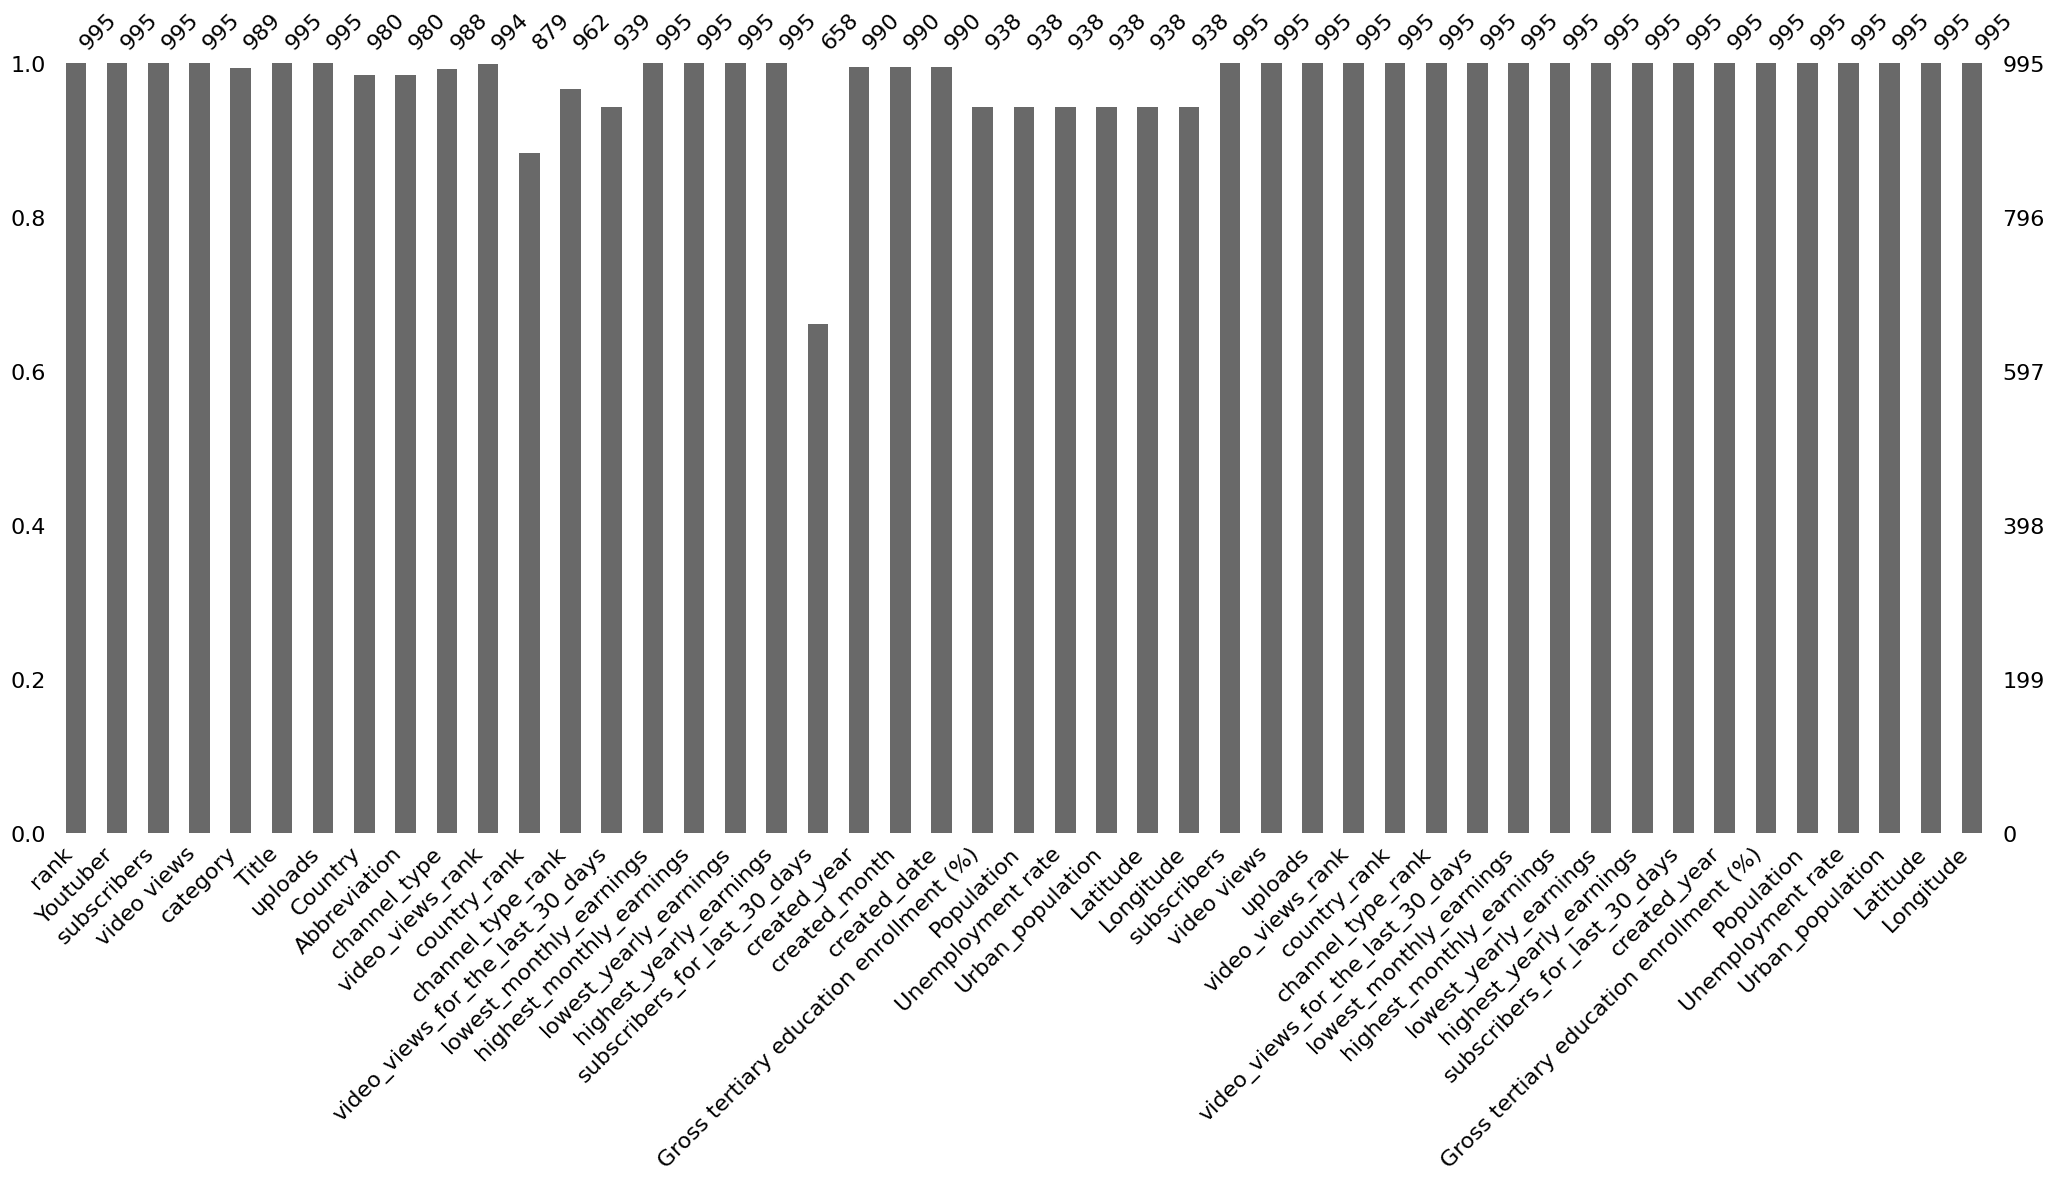

In [105]:
msno.bar(df3)

In [ ]:
df3.to_csv("df3.csv") #To export df3

In [3]:
df3 =pd.read_csv("/kaggle/input/dataframe-3/df3.csv") #Upload df3

# Aims of Project

YouTube Analytics: Gain valuable insights into the success factors of top YouTube channels and understand what sets them apart from the rest.



## Youtube Analytics

### Last Edits

In [4]:
df3= df3.drop(columns=["Unnamed: 0.1","Unnamed: 0"]) #I drop unnecessary columns.

In [6]:
Top_10=df3.head(10) #Select Top 10 Youtubers

In [7]:
category_list = Top_10["category"].value_counts().index #I choose categories as a list

In [8]:
category_amount= list(Top_10["category"].value_counts()) #I choose values

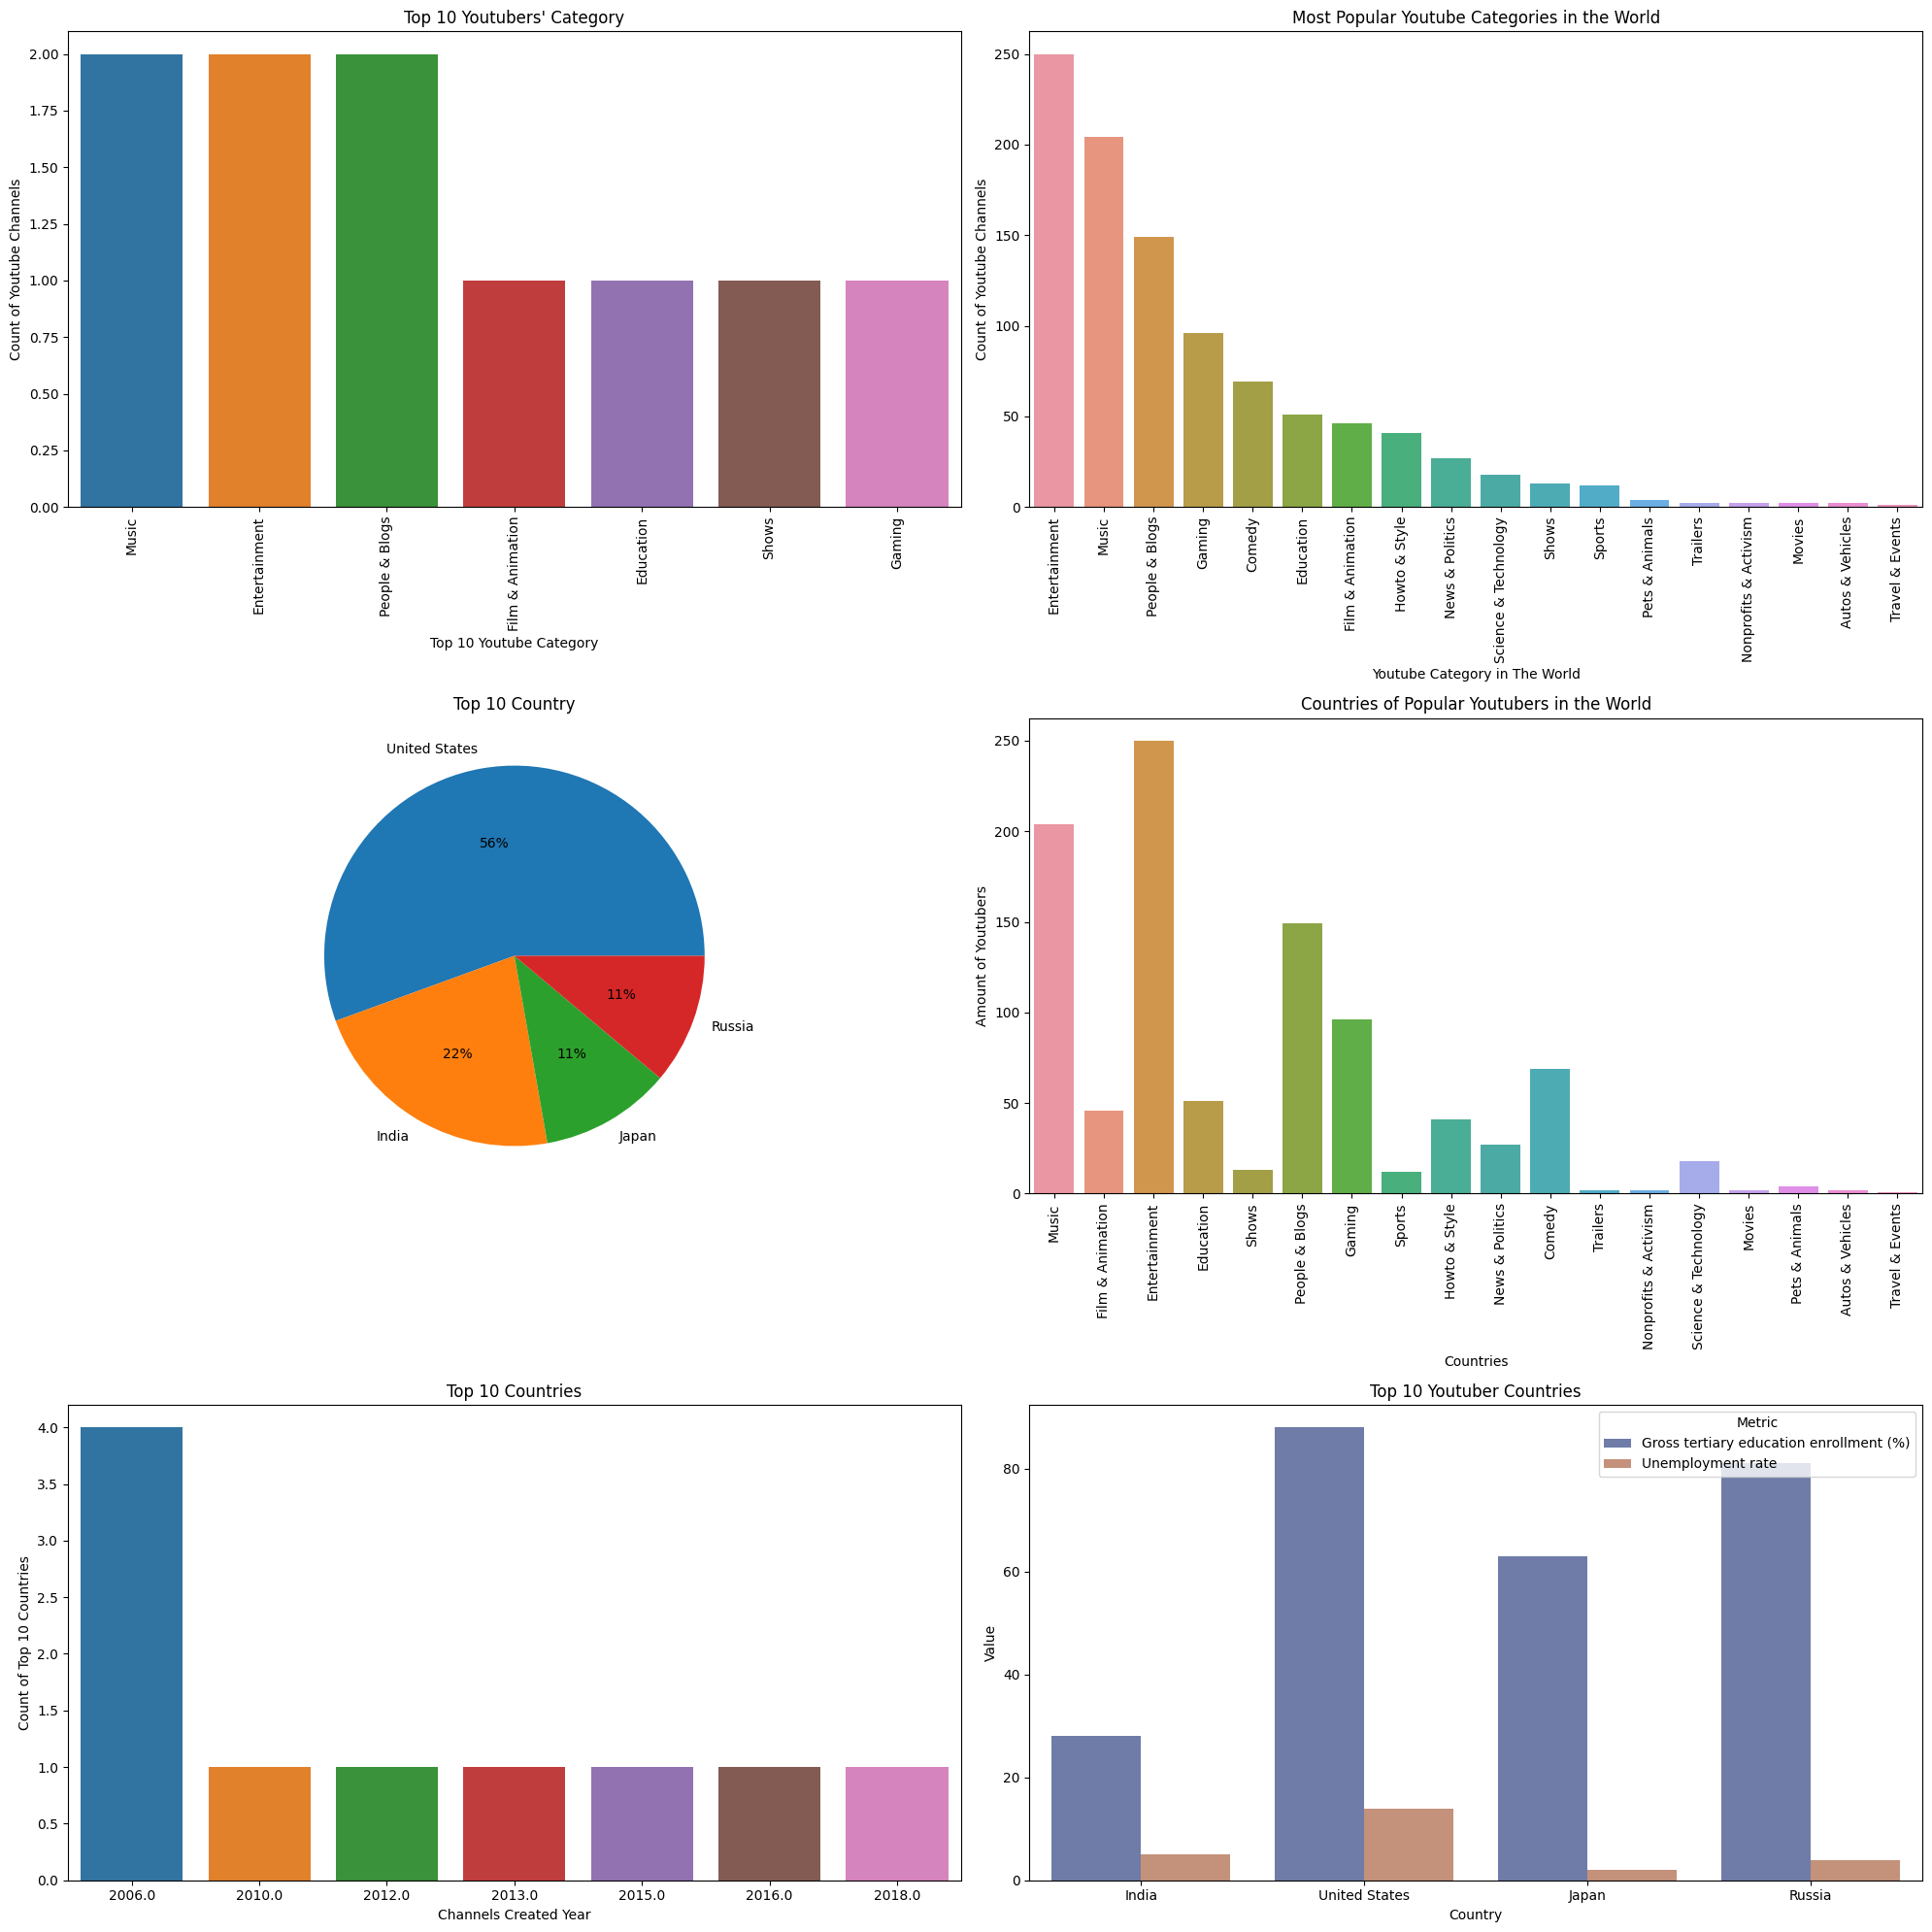

In [18]:
#Making Dashboard using Matplotlib and Seaborn
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.8)

# First subplot
sns.barplot(ax=axes[0, 0], x=category_list, y=category_amount)
axes[0, 0].set_title("Top 10 Youtubers' Category")
axes[0, 0].set_xlabel("Top 10 Youtube Category")
axes[0, 0].set_ylabel("Count of Youtube Channels")
axes[0, 0].tick_params(axis='x', rotation=90)

# Second subplot
sns.barplot(ax=axes[0, 1], x=df3["category"].value_counts().index, y=df3["category"].value_counts().values)
axes[0, 1].set_title("Most Popular Youtube Categories in the World")
axes[0, 1].set_xlabel("Youtube Category in The World")
axes[0, 1].set_ylabel("Count of Youtube Channels")
axes[0, 1].tick_params(axis='x', rotation=90)

# Third subplot (Pie chart)
Countries = list(Top_10["Country"].value_counts().index)
axes[1, 0].pie(x=Top_10["Country"].value_counts().values, labels=Countries, autopct='%.0f%%')
axes[1, 0].set_title("Top 10 Country")

# Forth subplot
sns.countplot(ax=axes[1, 1], data=df3, x="category")
axes[1, 1].set_title("Countries of Popular Youtubers in the World")
axes[1, 1].set_xlabel("Countries")
axes[1, 1].set_ylabel("Amount of Youtubers")
axes[1, 1].tick_params(axis='x', rotation=90)

# Fifth subplot
sns.countplot(ax=axes[2, 0], data=Top_10, x="created_year")
axes[2, 0].set_title("Top 10 Countries")
axes[2, 0].set_xlabel("Channels Created Year")
axes[2, 0].set_ylabel("Count of Top 10 Countries")

# Barplot of Education and Unemployment Rate
df_long = pd.melt(Top_10, id_vars=['Country'], value_vars=['Gross tertiary education enrollment (%)', 'Unemployment rate'], var_name='Metric', value_name='Value')
sns.barplot(ax=axes[2, 1], data=df_long, x="Country", y="Value", hue="Metric", palette="dark", alpha=.6)
axes[2, 1].set_title("Top 10 Youtuber Countries")
axes[2, 1].set_xlabel("Country")
axes[2, 1].set_ylabel("Value")
axes[2, 1].legend(title="Metric")

plt.tight_layout()
plt.show()